In [1]:
import pandas as pd
import numpy as np

# Load the dataset (update the file path if necessary)
file_path = "Off_Precovid.csv" 
df = pd.read_csv(file_path, low_memory=False)

# Convert 'Date' and 'Time' columns into a single 'Datetime' column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce', dayfirst=True)

# Drop original 'Date' and 'Time' columns
df.drop(columns=['Date', 'Time'], inplace=True)

# Drop status columns if they exist (unnecessary for analysis)
df = df.loc[:, ~df.columns.str.contains('Status', case=False)]

# Replace "No data" or similar values with NaN
df.replace(["No data", "missing", "NaN"], np.nan, inplace=True)

# Convert all remaining columns to numeric (excluding 'Datetime')
for col in df.columns:
    if col != "Datetime":
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop duplicate timestamps if they exist
df.drop_duplicates(subset=["Datetime"], keep="first", inplace=True)

# Sort by Datetime
df.sort_values(by="Datetime", inplace=True)

# Interpolate missing values using a linear method (suitable for time series)
df.interpolate(method='linear', inplace=True)

# Reset index (optional)
df.reset_index(drop=True, inplace=True)

# Save the cleaned dataset
cleaned_file_path = "PreCovidData.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaning complete. Saved as: {cleaned_file_path}")

Cleaning complete. Saved as: PreCovidData.csv


In [2]:
import pandas as pd
import numpy as np

# Load the dataset (update the file path if necessary)
file_path = "Off_Covid.csv" 
df = pd.read_csv(file_path, low_memory=False)

# Convert 'Date' and 'Time' columns into a single 'Datetime' column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce', dayfirst=True)

# Drop original 'Date' and 'Time' columns
df.drop(columns=['Date', 'Time'], inplace=True)

# Drop status columns if they exist (unnecessary for analysis)
df = df.loc[:, ~df.columns.str.contains('Status', case=False)]

# Replace "No data" or similar values with NaN
df.replace(["No data", "missing", "NaN"], np.nan, inplace=True)

# Convert all remaining columns to numeric (excluding 'Datetime')
for col in df.columns:
    if col != "Datetime":
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop duplicate timestamps if they exist
df.drop_duplicates(subset=["Datetime"], keep="first", inplace=True)

# Sort by Datetime
df.sort_values(by="Datetime", inplace=True)

# Interpolate missing values using a linear method (suitable for time series)
df.interpolate(method='linear', inplace=True)

# Reset index (optional)
df.reset_index(drop=True, inplace=True)

# Save the cleaned dataset
cleaned_file_path = "CovidData.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaning complete. Saved as: {cleaned_file_path}")

Cleaning complete. Saved as: CovidData.csv


In [3]:
import pandas as pd
import numpy as np

# Load the dataset (update the file path if necessary)
file_path = "Off_Postcovid.csv" 
df = pd.read_csv(file_path, low_memory=False)

# Convert 'Date' and 'Time' columns into a single 'Datetime' column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce', dayfirst=True)

# Drop original 'Date' and 'Time' columns
df.drop(columns=['Date', 'Time'], inplace=True)

# Drop status columns if they exist (unnecessary for analysis)
df = df.loc[:, ~df.columns.str.contains('Status', case=False)]

# Replace "No data" or similar values with NaN
df.replace(["No data", "missing", "NaN"], np.nan, inplace=True)

# Convert all remaining columns to numeric (excluding 'Datetime')
for col in df.columns:
    if col != "Datetime":
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop duplicate timestamps if they exist
df.drop_duplicates(subset=["Datetime"], keep="first", inplace=True)

# Sort by Datetime
df.sort_values(by="Datetime", inplace=True)

# Interpolate missing values using a linear method (suitable for time series)
df.interpolate(method='linear', inplace=True)

# Reset index (optional)
df.reset_index(drop=True, inplace=True)

# Save the cleaned dataset
cleaned_file_path = "PostCovidData.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaning complete. Saved as: {cleaned_file_path}")

Cleaning complete. Saved as: PostCovidData.csv


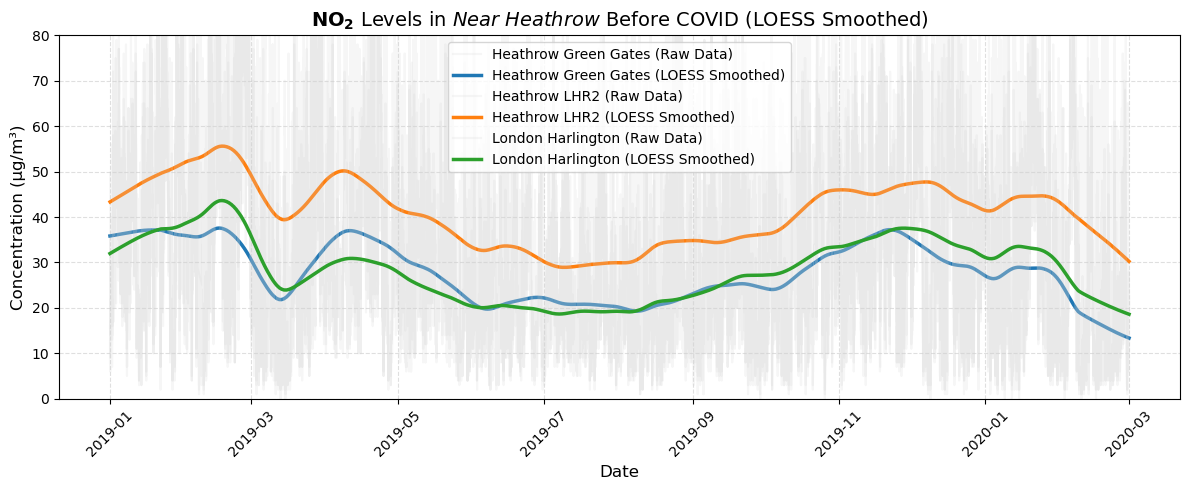

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "PreCovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ Nitrogen dioxide",
    "Heathrow LHR2": "Heathrow LHR2/ Nitrogen dioxide",
    "London Harlington": "London Harlington/ Nitrogen dioxide"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{NO_2}$ Levels in $\mathit{Near\ Heathrow}$ Before COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()


plt.savefig("NO2_Near_Heathrow_PreCovid.png", dpi=300, bbox_inches='tight')

# Show the final polished plot
plt.show()

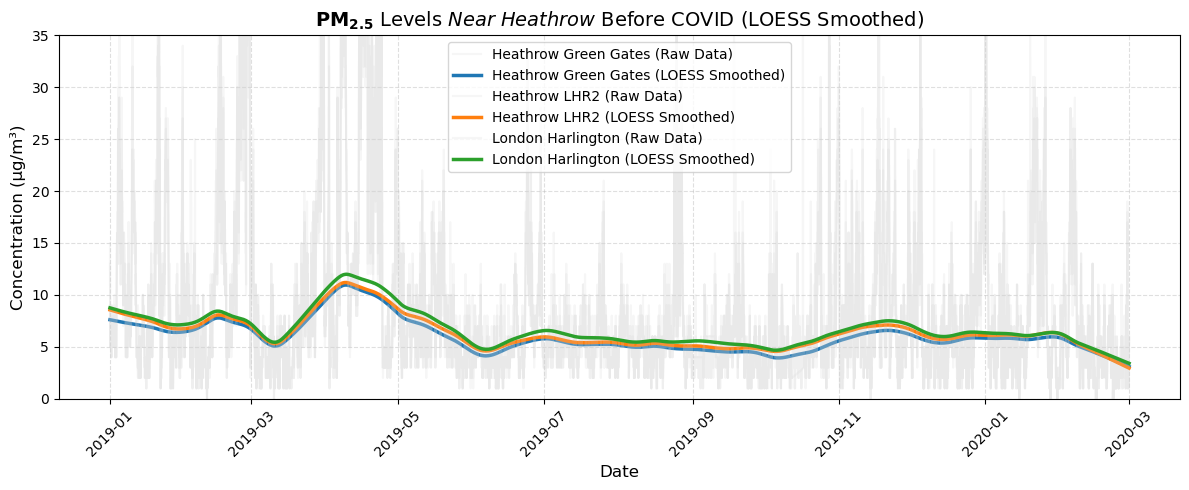

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset
file_path = "PreCovidData.csv"  # Ensure the correct file name
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites for PM₂.₅
near_heathrow_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ PM2.5 Particulate matter",
    "Heathrow LHR2": "Heathrow LHR2/ PM2.5 Particulate matter",
    "London Harlington": "London Harlington/ PM2.5 Particulate matter",
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{2.5}}$ Levels $\mathit{Near\ Heathrow}$ Before COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=35)  # Adjust y-axis for clearer visualization
plt.tight_layout()
plt.savefig("PM2.5_Near_Heathrow_PreCovid.png", dpi=300, bbox_inches='tight')
# Show the final polished plot
plt.show()


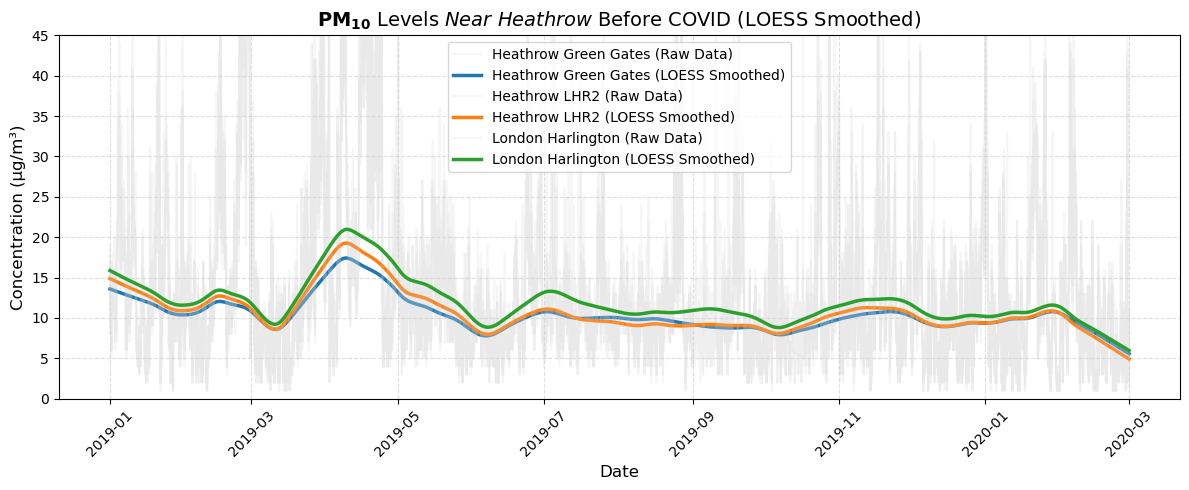

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset
file_path = "PreCovidData.csv"  # Ensure the correct file name
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites for PM₁₀
near_heathrow_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ PM10 Particulate matter",
    "Heathrow LHR2": "Heathrow LHR2/ PM10 Particulate matter",
    "London Harlington": "London Harlington/ PM10 Particulate matter",
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{10}}$ Levels $\mathit{Near\ Heathrow}$ Before COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=45)  # Adjust y-axis to focus on relevant range
plt.tight_layout()
plt.savefig("PM10_Near_Heathrow_PreCovid.png", dpi=300, bbox_inches='tight')
# Show the final polished plot
plt.show()

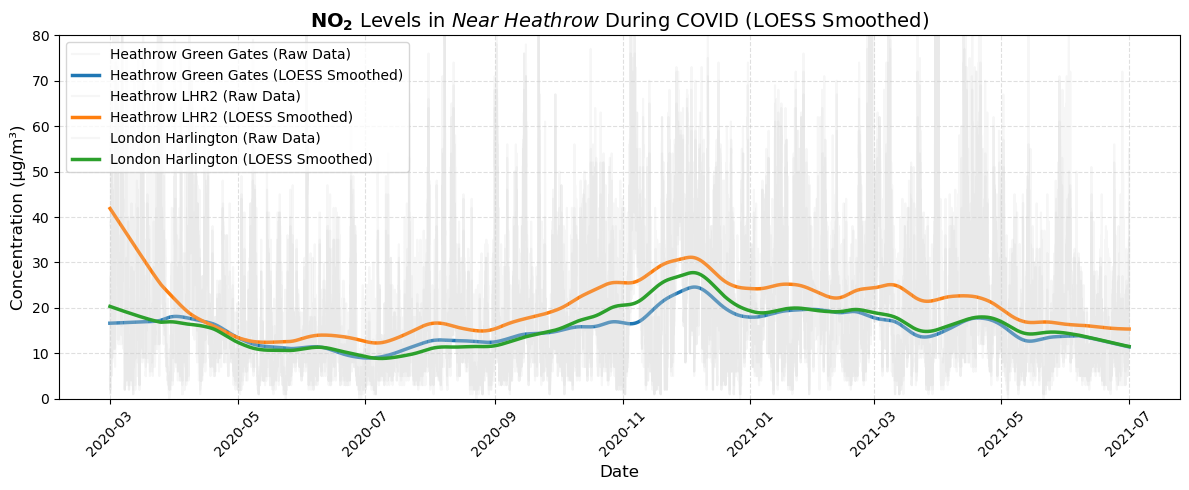

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "CovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ Nitrogen dioxide",
    "Heathrow LHR2": "Heathrow LHR2/ Nitrogen dioxide",
    "London Harlington": "London Harlington/ Nitrogen dioxide"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{NO_2}$ Levels in $\mathit{Near\ Heathrow}$ During COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

plt.savefig("NO2_Near_Heathrow_DuringCovid.png", dpi=300, bbox_inches='tight')
# Show the final polished plot
plt.show()

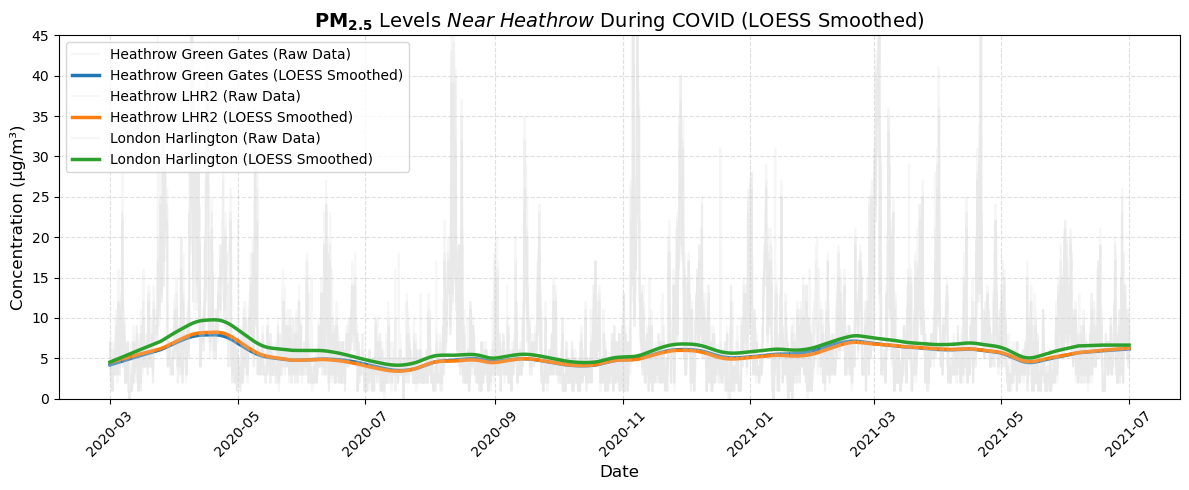

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "CovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites for PM₂.₅
near_heathrow_sites_pm25 = {
    "Heathrow Green Gates": "Heathrow Green Gates/ PM2.5 Particulate matter",
    "Heathrow LHR2": "Heathrow LHR2/ PM2.5 Particulate matter",
    "London Harlington": "London Harlington/ PM2.5 Particulate matter"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites_pm25.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{2.5}}$ Levels $\mathit{Near\ Heathrow}$ During COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 45)  # Keeping scale consistent with pre-COVID PM₂.₅ graph
plt.tight_layout()
plt.savefig("PM2.5_Near_Heathrow_duringCovid.png", dpi=300, bbox_inches='tight')
# Show the final polished plot
plt.show()

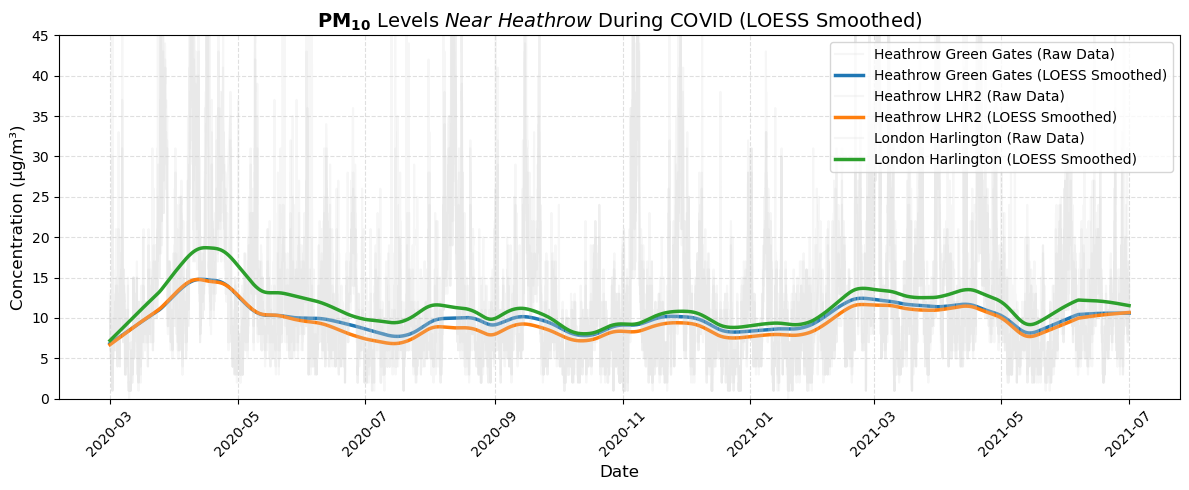

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "CovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites for PM₁₀
near_heathrow_sites_pm10 = {
    "Heathrow Green Gates": "Heathrow Green Gates/ PM10 Particulate matter",
    "Heathrow LHR2": "Heathrow LHR2/ PM10 Particulate matter",
    "London Harlington": "London Harlington/ PM10 Particulate matter"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites_pm10.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{10}}$ Levels $\mathit{Near\ Heathrow}$ During COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 45)  # Ensuring consistent y-axis with pre-COVID graph
plt.tight_layout()
plt.savefig("PM10_Near_Heathrow_duringCovid.png", dpi=300, bbox_inches='tight')
# Show the final polished plot
plt.show()


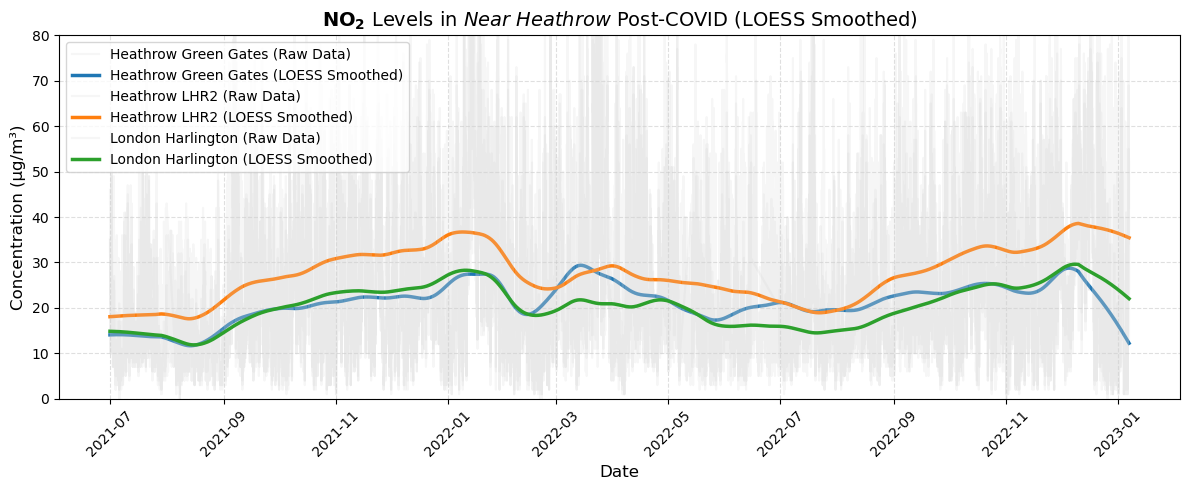

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned post-COVID dataset
file_path = "PostCovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites for NO₂
near_heathrow_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ Nitrogen dioxide",
    "Heathrow LHR2": "Heathrow LHR2/ Nitrogen dioxide",
    "London Harlington": "London Harlington/ Nitrogen dioxide"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{NO_2}$ Levels in $\mathit{Near\ Heathrow}$ Post-COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=80)  # Ensure y-axis starts from zero, limit top to 80 µg/m³ for clarity
plt.tight_layout()

plt.savefig("NO2_Near_Heathrow_PostCovid.png", dpi=300, bbox_inches='tight')

# Show the final polished plot
plt.show()

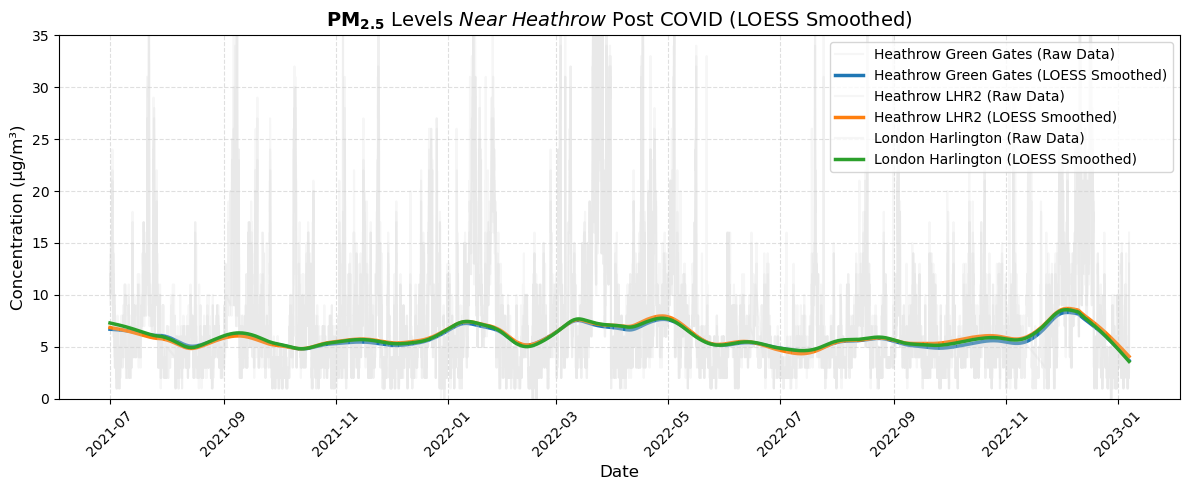

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned post-COVID dataset
file_path = "PostCovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites for PM₂.₅
near_heathrow_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ PM2.5 Particulate matter",
    "Heathrow LHR2": "Heathrow LHR2/ PM2.5 Particulate matter",
    "London Harlington": "London Harlington/ PM2.5 Particulate matter"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{2.5}}$ Levels $\mathit{Near\ Heathrow}$ Post COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=35)  # Ensure y-axis starts from zero, limit top to 35 µg/m³ for clarity
plt.tight_layout()
plt.savefig("PM2.5_Near_Heathrow_PostCovid.png", dpi=300, bbox_inches='tight')
# Show the final polished plot
plt.show()

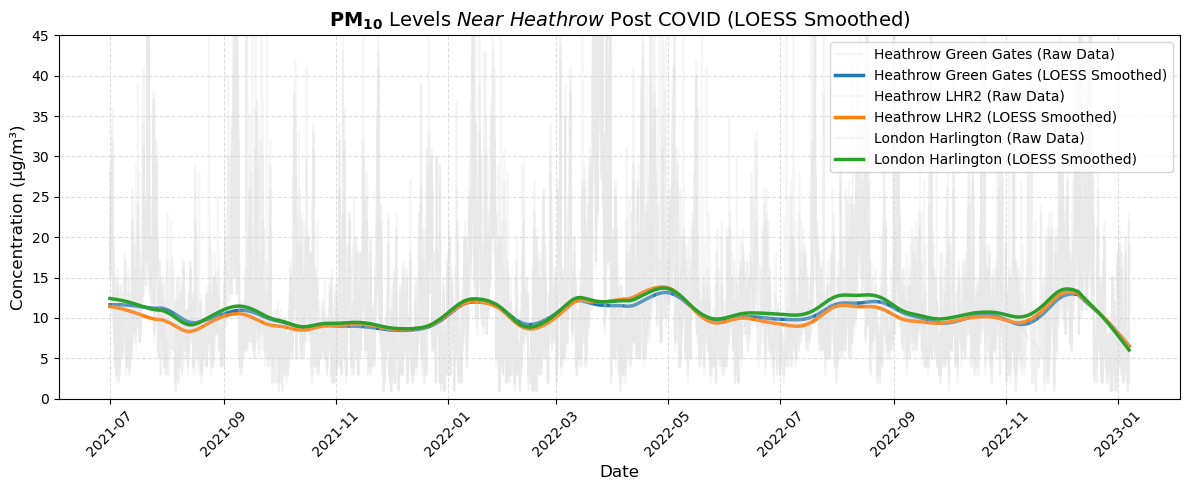

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned post-COVID dataset
file_path = "PostCovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites for PM₁₀
near_heathrow_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ PM10 Particulate matter",
    "Heathrow LHR2": "Heathrow LHR2/ PM10 Particulate matter",
    "London Harlington": "London Harlington/ PM10 Particulate matter"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{10}}$ Levels $\mathit{Near\ Heathrow}$ Post COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=45)  # Ensure y-axis starts from zero, limit top to 45 µg/m³ for clarity
plt.tight_layout()
plt.savefig("PM10_Near_Heathrow_PostCovid.png", dpi=300, bbox_inches='tight')
# Show the final polished plot
plt.show()

In [15]:
import pandas as pd

# Load the cleaned datasets
pre_covid_df = pd.read_csv("PreCovidData.csv", parse_dates=["Datetime"], index_col="Datetime")
during_covid_df = pd.read_csv("CovidData.csv", parse_dates=["Datetime"], index_col="Datetime")
post_covid_df = pd.read_csv("PostCovidData.csv", parse_dates=["Datetime"], index_col="Datetime")

# Define monitoring sites near Heathrow **without pollutant names**
near_heathrow_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates",
    "Heathrow LHR2": "Heathrow LHR2",
    "London Harlington": "London Harlington"
}

# Define pollutants to analyze
pollutants = ["Nitrogen dioxide", "PM10 Particulate matter", "PM2.5 Particulate matter"]

# Function to compute descriptive statistics
def compute_stats(df, sites, pollutants, label):
    stats = []
    for site_name, site_prefix in sites.items():
        for pollutant in pollutants:
            col_name = f"{site_prefix}/ {pollutant}"  # Construct column name dynamically
            if col_name in df.columns:
                data = df[col_name].dropna()
                if not data.empty:
                    stats.append({
                        "Period": label,
                        "Site": site_name,
                        "Pollutant": pollutant,
                        "Mean": round(data.mean(), 2),
                        "Median": round(data.median(), 2),
                        "Min": round(data.min(), 2),
                        "Max": round(data.max(), 2),
                        "Std Dev": round(data.std(), 2),
                        "25th Percentile": round(data.quantile(0.25), 2),
                        "75th Percentile": round(data.quantile(0.75), 2)
                    })
    return pd.DataFrame(stats)

# Compute statistics for each period
pre_covid_stats = compute_stats(pre_covid_df, near_heathrow_sites, pollutants, "Pre-COVID")
during_covid_stats = compute_stats(during_covid_df, near_heathrow_sites, pollutants, "During-COVID")
post_covid_stats = compute_stats(post_covid_df, near_heathrow_sites, pollutants, "Post-COVID")

# Combine all results into a single DataFrame
stats_df = pd.concat([pre_covid_stats, during_covid_stats, post_covid_stats])

# Save results to CSV
stats_df.to_csv("Descriptive_Statistics.csv", index=False)

# Display the final statistics table
import ace_tools as tools
tools.display_dataframe_to_user(name="Descriptive Statistics", dataframe=stats_df)

print("Descriptive statistics computed and saved as 'Descriptive_Statistics.csv'.")


ModuleNotFoundError: No module named 'ace_tools'

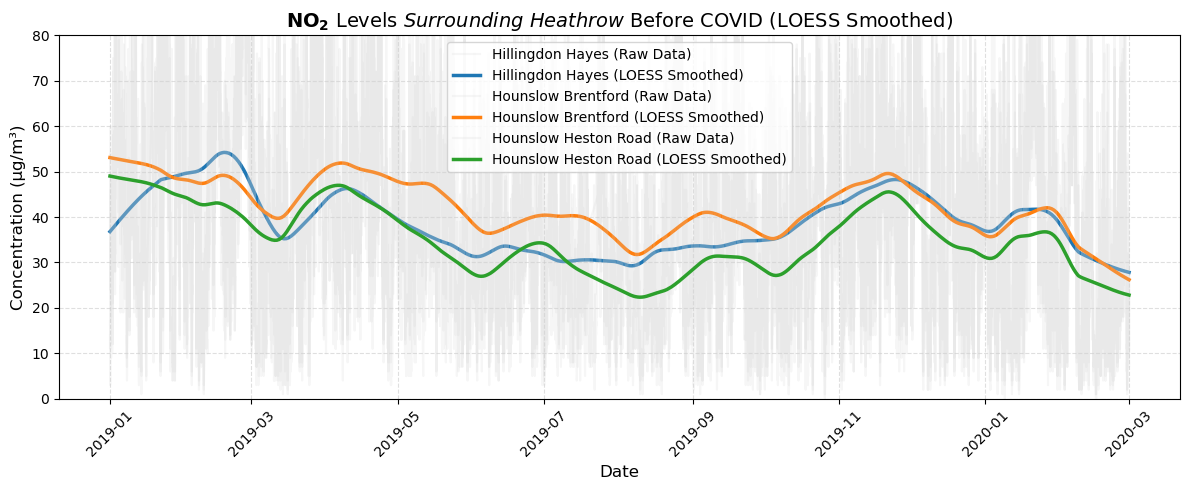

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "PreCovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Hillingdon Hayes": "Hillingdon Hayes/ Nitrogen dioxide",
    "Hounslow Brentford": "Hounslow Brentford/ Nitrogen dioxide",
    "Hounslow Heston Road": "Hounslow Heston Road/ Nitrogen dioxide"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{NO_2}$ Levels $\mathit{Surrounding\ Heathrow}$ Before COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

plt.savefig("NO2_surrounding_Heathrow_BeforeCovid.png", dpi=300, bbox_inches='tight')
# Show the final polished plot
plt.show()

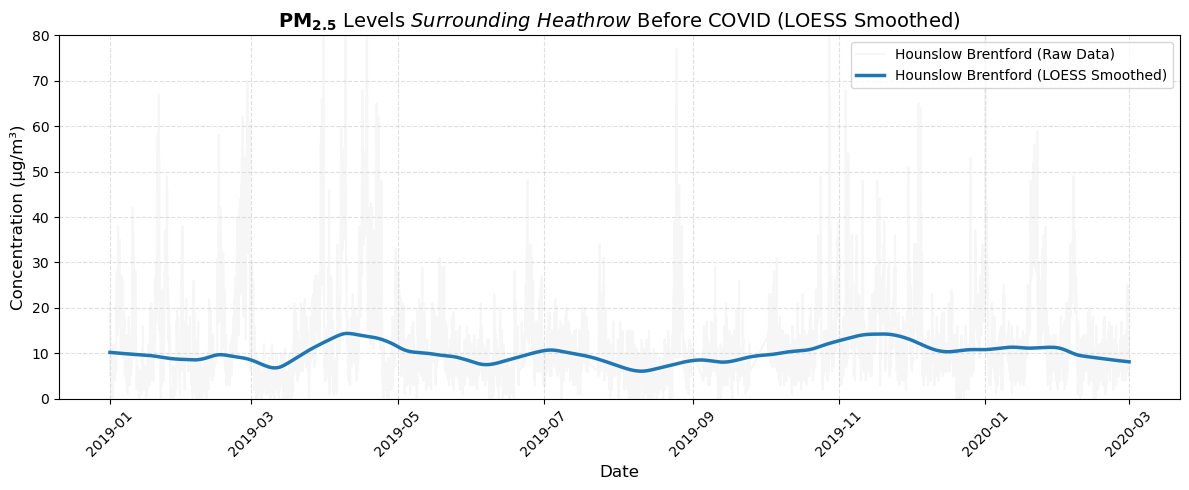

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "PreCovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Hillingdon Hayes": "Hillingdon Hayes/ PM2.5 Particulate matter",
    "Hounslow Brentford": "Hounslow Brentford/ PM2.5 Particulate matter",
    "Hounslow Heston Road": "Hounslow Heston Road/ PM2.5 Particulate matter"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{2.5}}$ Levels $\mathit{Surrounding\ Heathrow}$ Before COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

# Show the final polished plot
plt.show()

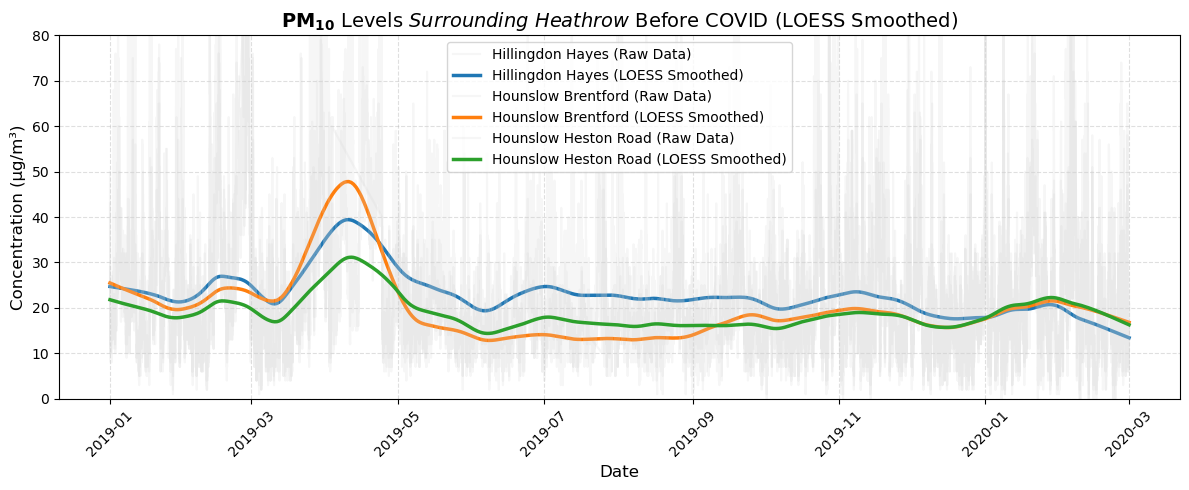

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "PreCovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Hillingdon Hayes": "Hillingdon Hayes/ PM10 Particulate matter",
    "Hounslow Brentford": "Hounslow Brentford/ PM10 Particulate matter",
    "Hounslow Heston Road": "Hounslow Heston Road/ PM10 Particulate matter"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{10}}$ Levels $\mathit{Surrounding\ Heathrow}$ Before COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

# Show the final polished plot
plt.show()

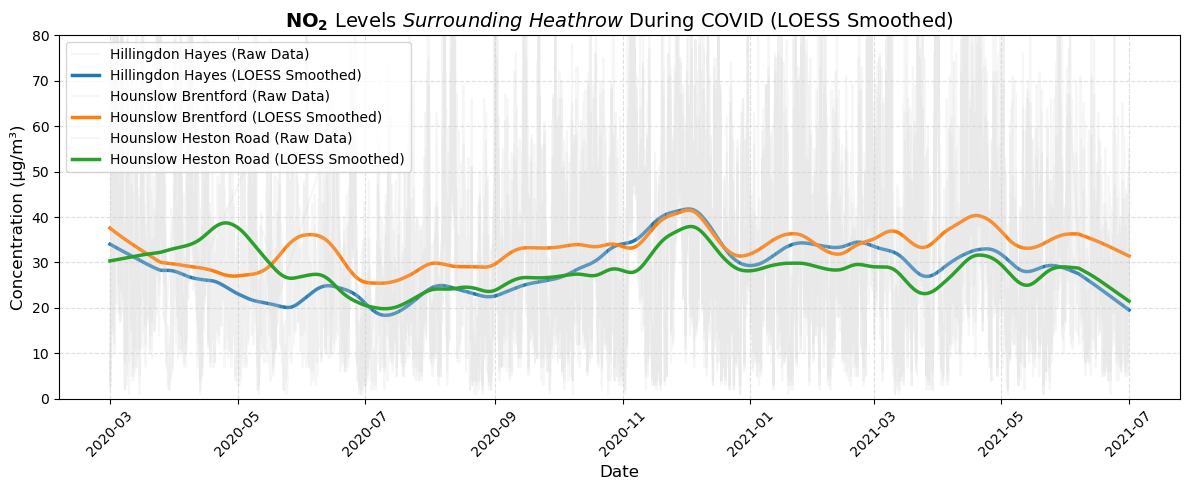

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "CovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Hillingdon Hayes": "Hillingdon Hayes/ Nitrogen dioxide",
    "Hounslow Brentford": "Hounslow Brentford/ Nitrogen dioxide",
    "Hounslow Heston Road": "Hounslow Heston Road/ Nitrogen dioxide"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{NO_2}$ Levels $\mathit{Surrounding\ Heathrow}$ During COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

plt.savefig("NO2_surrounding_Heathrow_duringCovid.png", dpi=300, bbox_inches='tight')
# Show the final polished plot
plt.show()

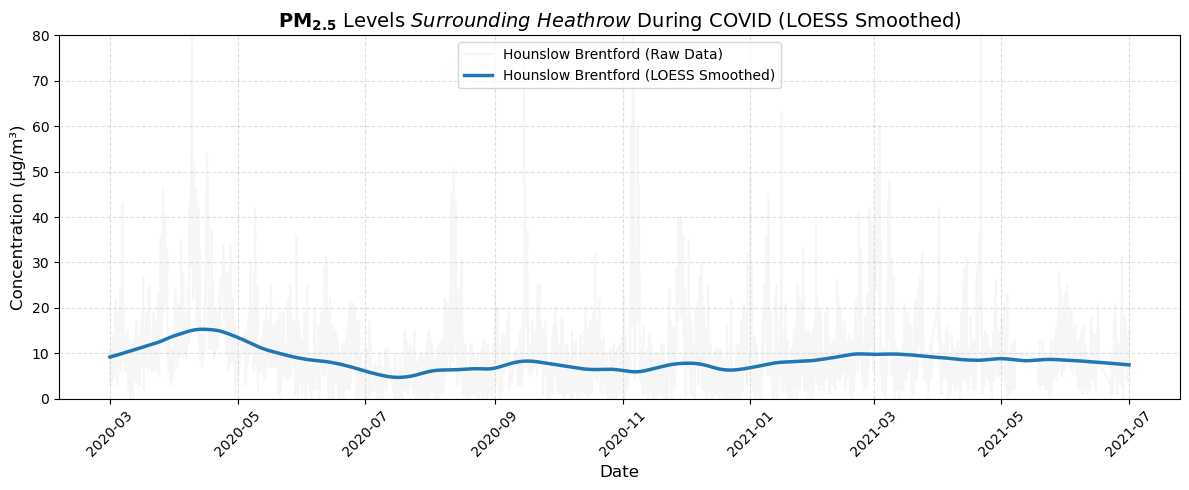

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "CovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Hillingdon Hayes": "Hillingdon Hayes/ PM2.5 Particulate matter",
    "Hounslow Brentford": "Hounslow Brentford/ PM2.5 Particulate matter",
    "Hounslow Heston Road": "Hounslow Heston Road/ PM2.5 Particulate matter"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{2.5}}$ Levels $\mathit{Surrounding\ Heathrow}$ During COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

# Show the final polished plot
plt.show()

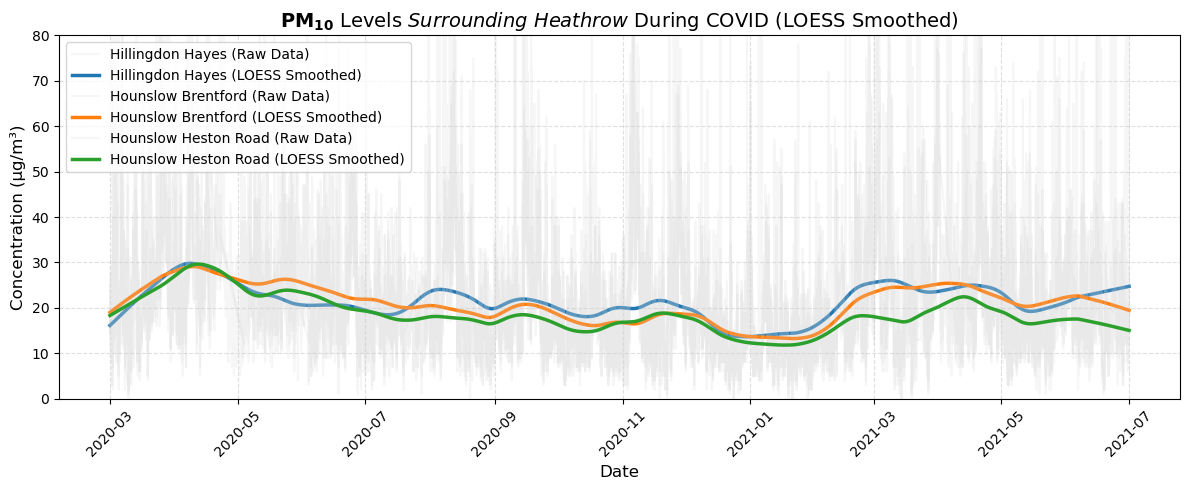

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "CovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Hillingdon Hayes": "Hillingdon Hayes/ PM10 Particulate matter",
    "Hounslow Brentford": "Hounslow Brentford/ PM10 Particulate matter",
    "Hounslow Heston Road": "Hounslow Heston Road/ PM10 Particulate matter"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{10}}$ Levels $\mathit{Surrounding\ Heathrow}$ During COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

# Show the final polished plot
plt.show()

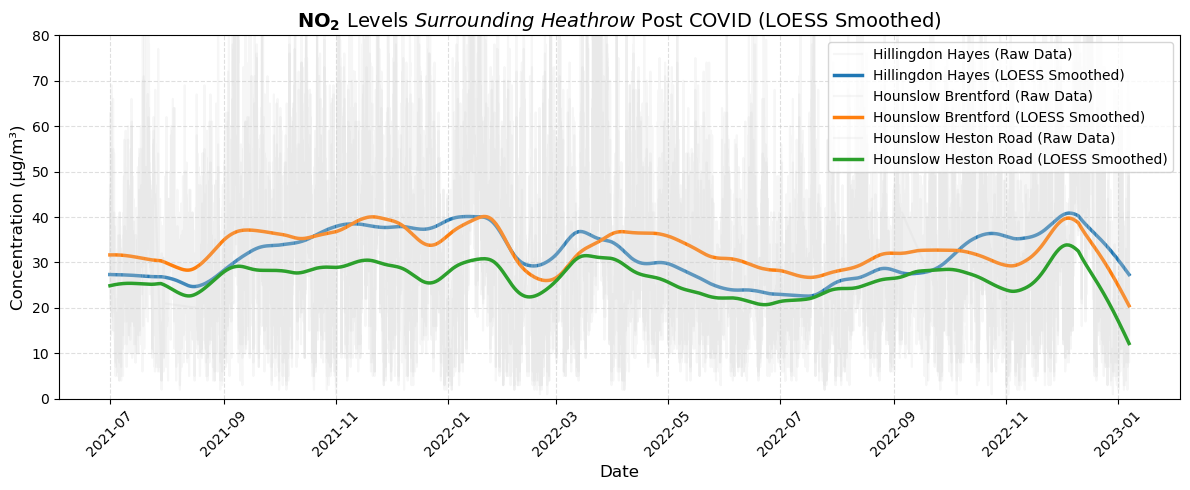

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "PostCovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Hillingdon Hayes": "Hillingdon Hayes/ Nitrogen dioxide",
    "Hounslow Brentford": "Hounslow Brentford/ Nitrogen dioxide",
    "Hounslow Heston Road": "Hounslow Heston Road/ Nitrogen dioxide"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{NO_2}$ Levels $\mathit{Surrounding\ Heathrow}$ Post COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()
plt.savefig("NO2_surrounding_Heathrow_postCovid.png", dpi=300, bbox_inches='tight')
# Show the final polished plot
plt.show()

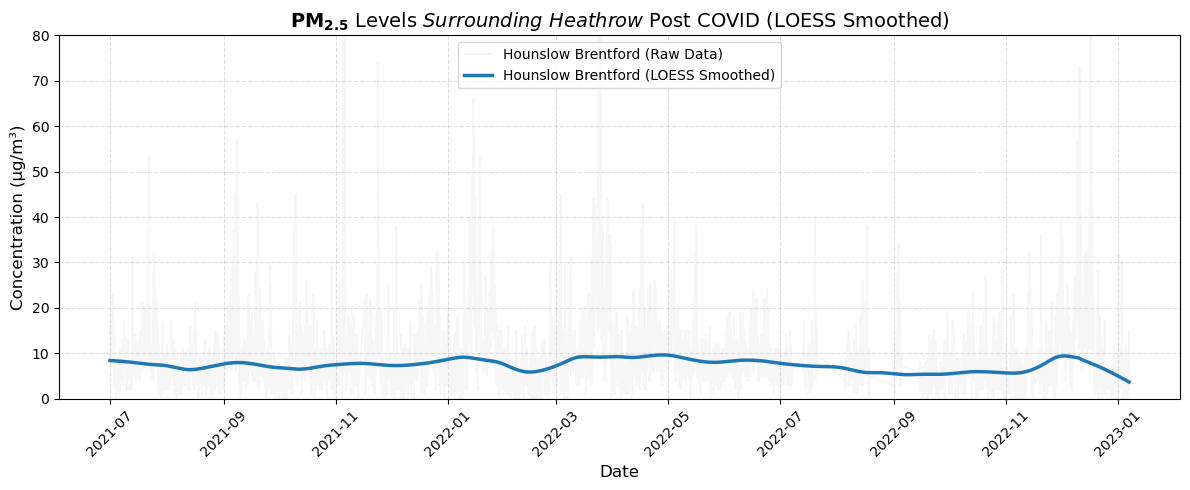

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "PostCovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Hillingdon Hayes": "Hillingdon Hayes/ PM2.5 Particulate matter",
    "Hounslow Brentford": "Hounslow Brentford/ PM2.5 Particulate matter",
    "Hounslow Heston Road": "Hounslow Heston Road/ PM2.5 Particulate matter"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{2.5}}$ Levels $\mathit{Surrounding\ Heathrow}$ Post COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

# Show the final polished plot
plt.show()

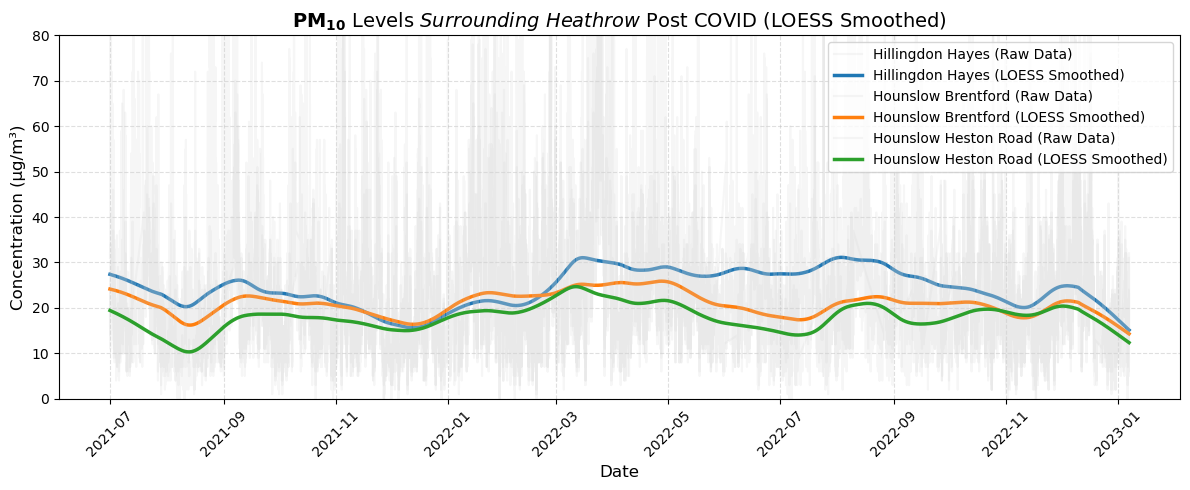

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "PostCovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Hillingdon Hayes": "Hillingdon Hayes/ PM10 Particulate matter",
    "Hounslow Brentford": "Hounslow Brentford/ PM10 Particulate matter",
    "Hounslow Heston Road": "Hounslow Heston Road/ PM10 Particulate matter"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{10}}$ Levels $\mathit{Surrounding\ Heathrow}$ Post COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

# Show the final polished plot
plt.show()

In [45]:
import pandas as pd

# Load the cleaned datasets
pre_covid_df = pd.read_csv("PreCovidData.csv", parse_dates=["Datetime"], index_col="Datetime")
during_covid_df = pd.read_csv("CovidData.csv", parse_dates=["Datetime"], index_col="Datetime")
post_covid_df = pd.read_csv("PostCovidData.csv", parse_dates=["Datetime"], index_col="Datetime")

# Define monitoring sites near Heathrow **without pollutant names**
surrounding_heathrow_sites = {
    "Hillingdon Hayes": "Hillingdon Hayes",
    "Hounslow Brentford": "Hounslow Brentford",
    "London Harlington": "London Harlington"
}

# Define pollutants to analyze
pollutants = ["Nitrogen dioxide", "PM10 Particulate matter", "PM2.5 Particulate matter"]

# Function to compute descriptive statistics
def compute_stats(df, sites, pollutants, label):
    stats = []
    for site_name, site_prefix in sites.items():
        for pollutant in pollutants:
            col_name = f"{site_prefix}/ {pollutant}"  # Construct column name dynamically
            if col_name in df.columns:
                data = df[col_name].dropna()
                if not data.empty:
                    stats.append({
                        "Period": label,
                        "Site": site_name,
                        "Pollutant": pollutant,
                        "Mean": round(data.mean(), 2),
                        "Median": round(data.median(), 2),
                        "Min": round(data.min(), 2),
                        "Max": round(data.max(), 2),
                        "Std Dev": round(data.std(), 2),
                        "25th Percentile": round(data.quantile(0.25), 2),
                        "75th Percentile": round(data.quantile(0.75), 2)
                    })
    return pd.DataFrame(stats)

# Compute statistics for each period
pre_covid_stats = compute_stats(pre_covid_df, surrounding_heathrow_sites, pollutants, "Pre-COVID")
during_covid_stats = compute_stats(during_covid_df, surrounding_heathrow_sites, pollutants, "During-COVID")
post_covid_stats = compute_stats(post_covid_df, surrounding_heathrow_sites, pollutants, "Post-COVID")

# Combine all results into a single DataFrame
stats_df = pd.concat([pre_covid_stats, during_covid_stats, post_covid_stats])

# Save results to CSV
stats_df.to_csv("Descriptive_Statistics_Surrounding.csv", index=False)

# Display the final statistics table
import ace_tools as tools
tools.display_dataframe_to_user(name="Descriptive Statistics Surrrounding", dataframe=stats_df)

print("Descriptive statistics computed and saved as 'Descriptive_Statistics Surrounding.csv'.")

ModuleNotFoundError: No module named 'ace_tools'

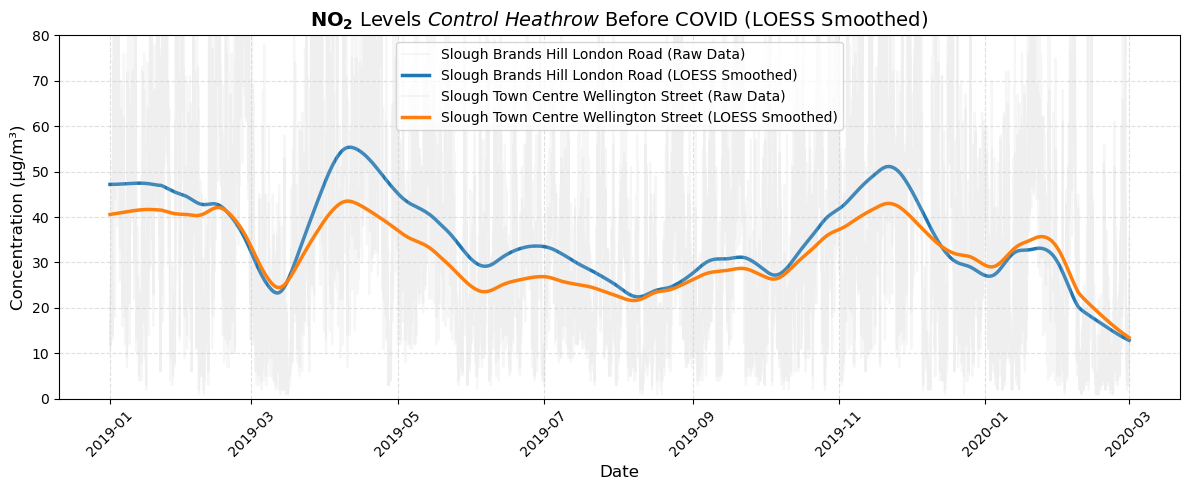

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "PreCovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Slough Brands Hill London Road": "Slough Brands Hill London Road/ Nitrogen dioxide",
    "Slough Town Centre Wellington Street": "Slough Town Centre Wellington Street/ Nitrogen dioxide"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{NO_2}$ Levels $\mathit{Control\ Heathrow}$ Before COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

# Show the final polished plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


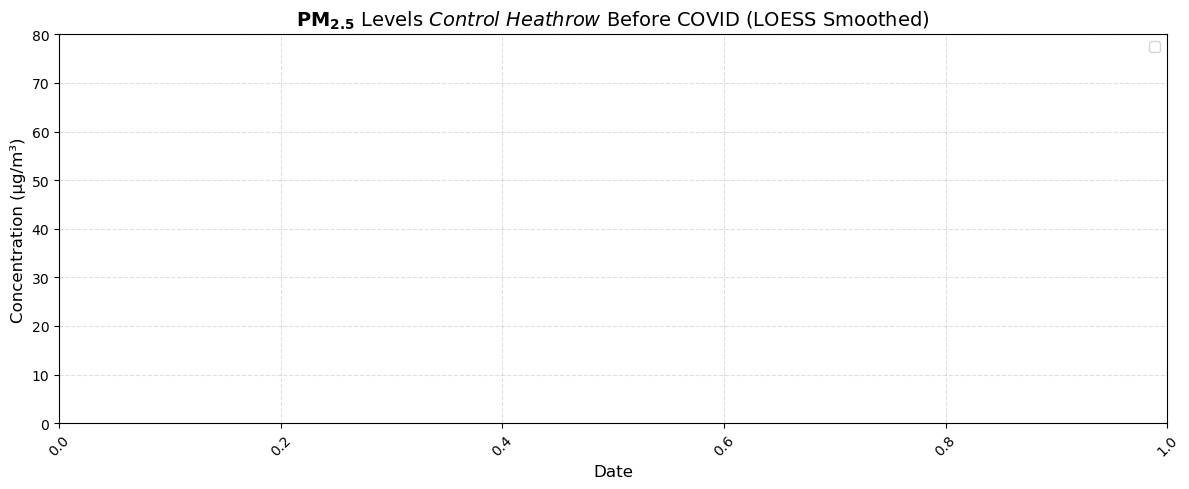

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "PreCovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Slough Brands Hill London Road": "Slough Brands Hill London Road/ PM2.5 Particulate matter",
    "Slough Town Centre Wellington Street": "Slough Town Centre Wellington Street/ PM2.5 Particulate matter"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{2.5}}$ Levels $\mathit{Control\ Heathrow}$ Before COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

# Show the final polished plot
plt.show()

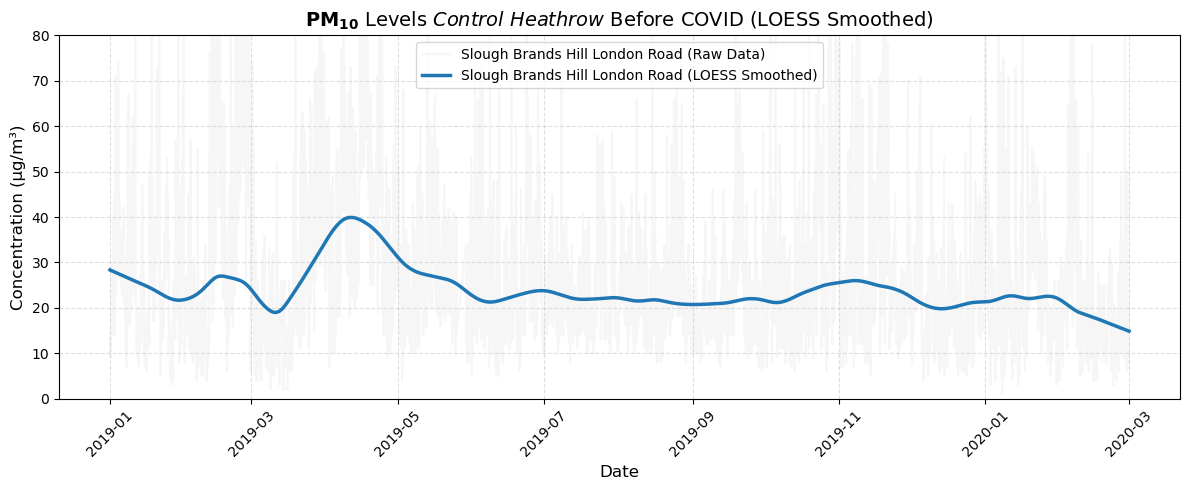

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "PreCovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Slough Brands Hill London Road": "Slough Brands Hill London Road/ PM10 Particulate matter",
    "Slough Town Centre Wellington Street": "Slough Town Centre Wellington Street/ PM10 Particulate matter"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{10}}$ Levels $\mathit{Control\ Heathrow}$ Before COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

# Show the final polished plot
plt.show()

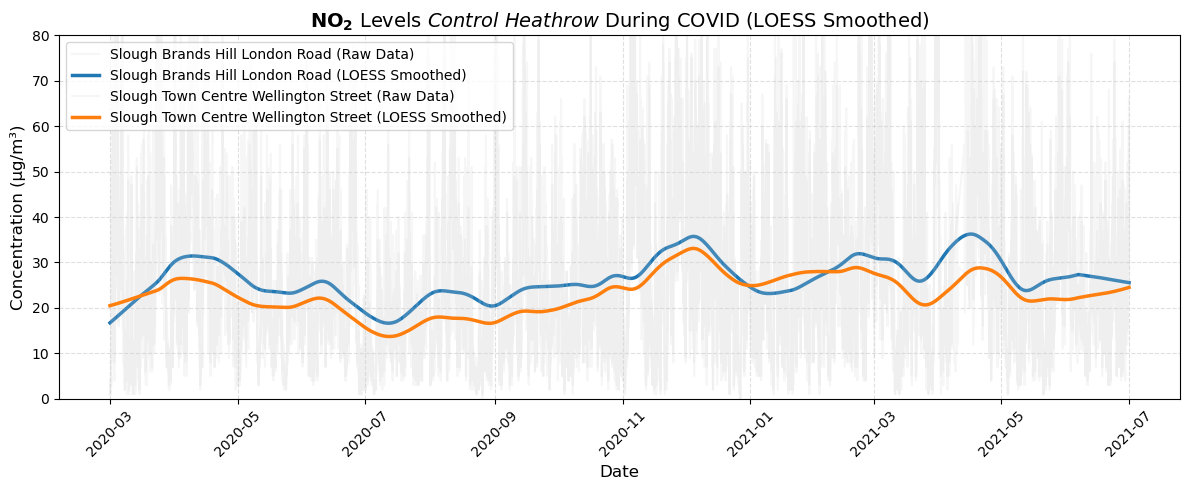

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "CovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Slough Brands Hill London Road": "Slough Brands Hill London Road/ Nitrogen dioxide",
    "Slough Town Centre Wellington Street": "Slough Town Centre Wellington Street/ Nitrogen dioxide"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{NO_2}$ Levels $\mathit{Control\ Heathrow}$ During COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

# Show the final polished plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


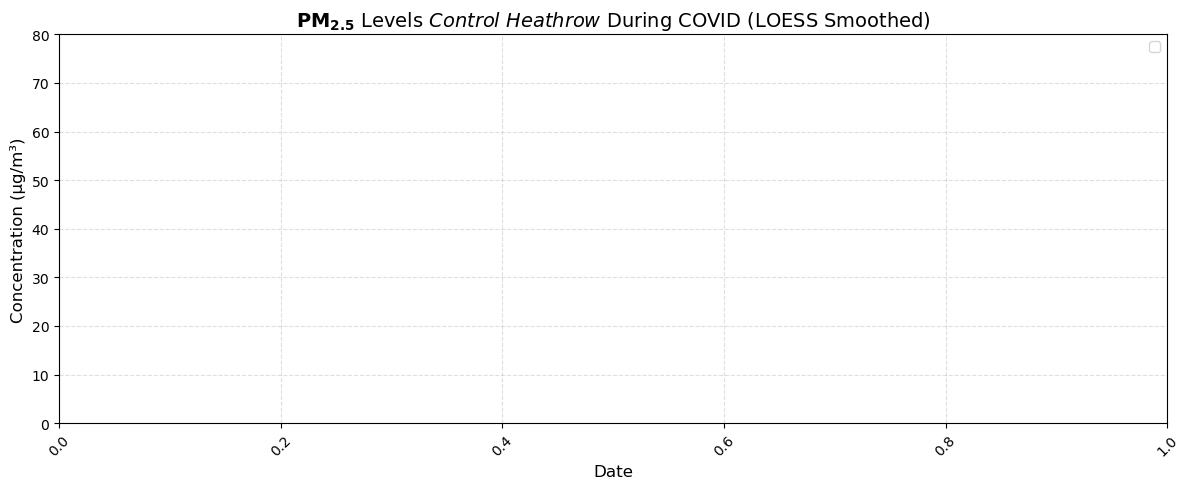

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "CovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Slough Brands Hill London Road": "Slough Brands Hill London Road/ PM2.5 Particulate matter",
    "Slough Town Centre Wellington Street": "Slough Town Centre Wellington Street/ PM2.5 Particulate matter"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{2.5}}$ Levels $\mathit{Control\ Heathrow}$ During COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

# Show the final polished plot
plt.show()

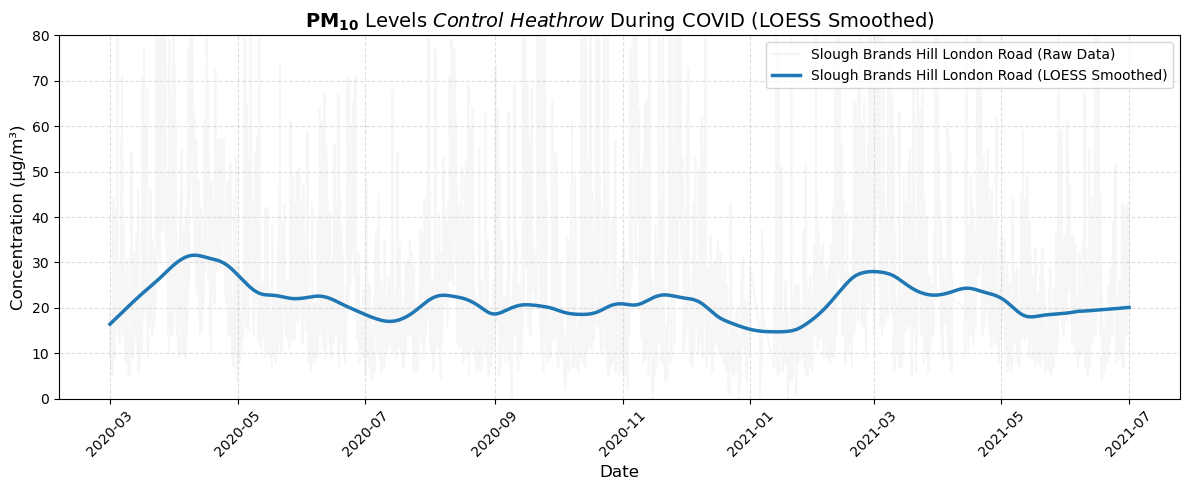

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "CovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Slough Brands Hill London Road": "Slough Brands Hill London Road/ PM10 Particulate matter",
    "Slough Town Centre Wellington Street": "Slough Town Centre Wellington Street/ PM10 Particulate matter"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{10}}$ Levels $\mathit{Control\ Heathrow}$ During COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

# Show the final polished plot
plt.show()

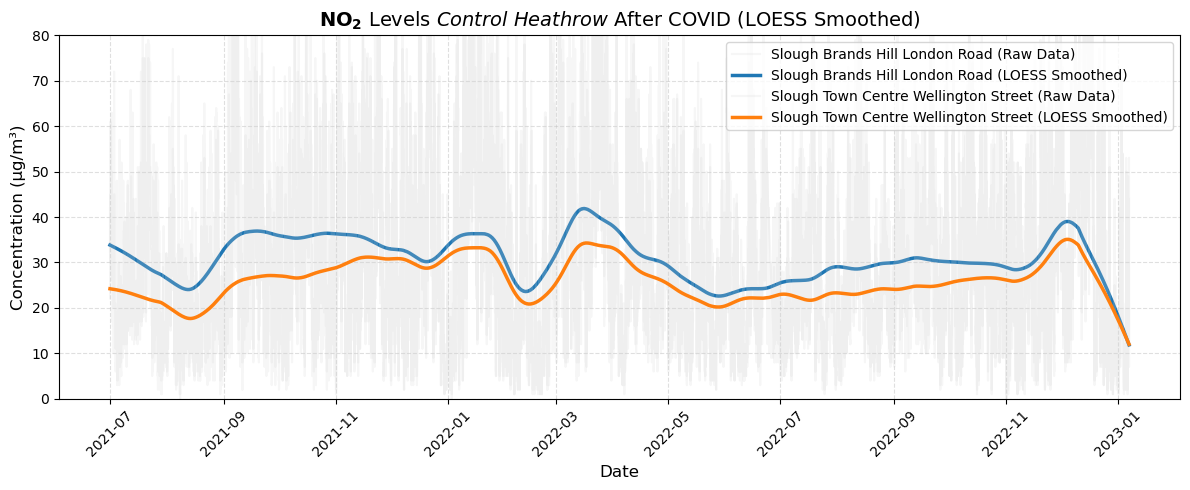

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "PostCovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Slough Brands Hill London Road": "Slough Brands Hill London Road/ Nitrogen dioxide",
    "Slough Town Centre Wellington Street": "Slough Town Centre Wellington Street/ Nitrogen dioxide"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{NO_2}$ Levels $\mathit{Control\ Heathrow}$ After COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

# Show the final polished plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


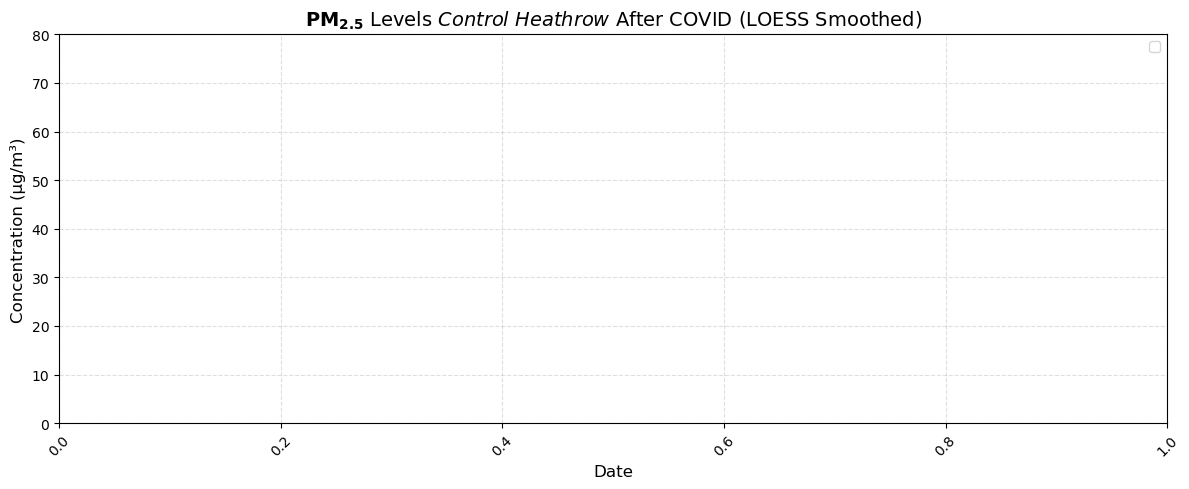

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "PostCovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Slough Brands Hill London Road": "Slough Brands Hill London Road/ PM2.5 Particulate matter",
    "Slough Town Centre Wellington Street": "Slough Town Centre Wellington Street/ PM2.5 Particulate matter"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{2.5}}$ Levels $\mathit{Control\ Heathrow}$ After COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

# Show the final polished plot
plt.show()

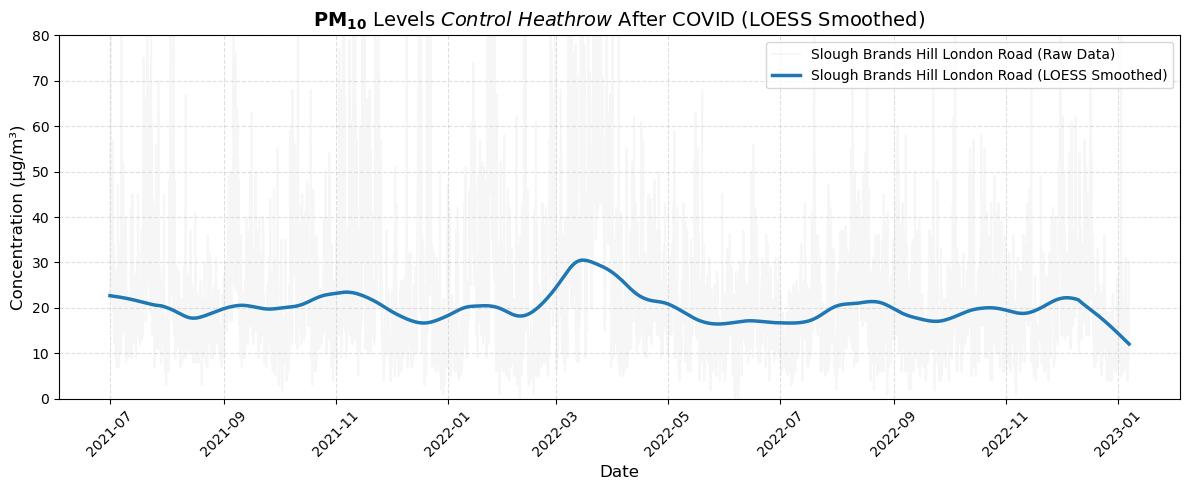

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the cleaned dataset for the COVID period
file_path = "PostCovidData.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define near Heathrow monitoring sites
near_heathrow_sites = {
    "Slough Brands Hill London Road": "Slough Brands Hill London Road/ PM10 Particulate matter",
    "Slough Town Centre Wellington Street": "Slough Town Centre Wellington Street/ PM10 Particulate matter"
}

# Create figure with refined size
plt.figure(figsize=(12, 5))

# Loop through each site and apply LOESS smoothing
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Drop NaN values to align timestamps and data correctly
        valid_data = df[col_name].dropna()
        valid_timestamps = valid_data.index.astype(np.int64) / 10**9  # Convert timestamps correctly
        
        # Apply LOESS smoothing (10% smoothing)
        smoothed = lowess(valid_data, valid_timestamps, frac=0.1)

        # Extract separate x and y columns
        smoothed_timestamps = smoothed[:, 0]  # First column (timestamps)
        smoothed_values = smoothed[:, 1]      # Second column (smoothed values)

        # Convert back to DataFrame
        df_loess = pd.DataFrame({"Datetime": smoothed_timestamps, "Smoothed": smoothed_values})
        df_loess["Datetime"] = pd.to_datetime(df_loess["Datetime"], unit="s")
        df_loess.set_index("Datetime", inplace=True)

        # Plot raw data with lower transparency
        plt.plot(df.index, df[col_name], color='lightgray', alpha=0.2, label=f"{site} (Raw Data)")

        # Plot LOESS-smoothed lines
        plt.plot(df_loess.index, df_loess["Smoothed"], linewidth=2.5, label=f"{site} (LOESS Smoothed)")

# Formatting improvements
plt.title(r'$\mathbf{PM_{10}}$ Levels $\mathit{Control\ Heathrow}$ After COVID (LOESS Smoothed)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Concentration (µg/m³)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45)
plt.ylim(0, 80)  # Ensure consistent y-axis scaling with pre-COVID graph
plt.tight_layout()

# Show the final polished plot
plt.show()

In [44]:
import pandas as pd

# Load the cleaned datasets
pre_covid_df = pd.read_csv("PreCovidData.csv", parse_dates=["Datetime"], index_col="Datetime")
during_covid_df = pd.read_csv("CovidData.csv", parse_dates=["Datetime"], index_col="Datetime")
post_covid_df = pd.read_csv("PostCovidData.csv", parse_dates=["Datetime"], index_col="Datetime")

# Define monitoring sites near Heathrow **without pollutant names**
surrounding_heathrow_sites = {
    "Slough Brands Hill London Road": "Slough Brands Hill London Road",
    "Slough Town Centre Wellington Street": "Slough Town Centre Wellington Street"
}

# Define pollutants to analyze
pollutants = ["Nitrogen dioxide", "PM10 Particulate matter", "PM2.5 Particulate matter"]

# Function to compute descriptive statistics
def compute_stats(df, sites, pollutants, label):
    stats = []
    for site_name, site_prefix in sites.items():
        for pollutant in pollutants:
            col_name = f"{site_prefix}/ {pollutant}"  # Construct column name dynamically
            if col_name in df.columns:
                data = df[col_name].dropna()
                if not data.empty:
                    stats.append({
                        "Period": label,
                        "Site": site_name,
                        "Pollutant": pollutant,
                        "Mean": round(data.mean(), 2),
                        "Median": round(data.median(), 2),
                        "Min": round(data.min(), 2),
                        "Max": round(data.max(), 2),
                        "Std Dev": round(data.std(), 2),
                        "25th Percentile": round(data.quantile(0.25), 2),
                        "75th Percentile": round(data.quantile(0.75), 2)
                    })
    return pd.DataFrame(stats)

# Compute statistics for each period
pre_covid_stats = compute_stats(pre_covid_df, surrounding_heathrow_sites, pollutants, "Pre-COVID")
during_covid_stats = compute_stats(during_covid_df, surrounding_heathrow_sites, pollutants, "During-COVID")
post_covid_stats = compute_stats(post_covid_df, surrounding_heathrow_sites, pollutants, "Post-COVID")

# Combine all results into a single DataFrame
stats_df = pd.concat([pre_covid_stats, during_covid_stats, post_covid_stats])

# Save results to CSV
stats_df.to_csv("Descriptive_Statistics_Control.csv", index=False)

# Display the final statistics table
import ace_tools as tools
tools.display_dataframe_to_user(name="Descriptive Statistics Control", dataframe=stats_df)

print("Descriptive statistics computed and saved as 'Descriptive_Statistics Control.csv'.")

ModuleNotFoundError: No module named 'ace_tools'

In [2]:
import pandas as pd

# File paths for the datasets
pre_covid_file = "PreCovidData.csv"
covid_file = "CovidData.csv"
post_covid_file = "PostCovidData.csv"

# Load datasets
df_pre = pd.read_csv(pre_covid_file, parse_dates=["Datetime"], index_col="Datetime")
df_covid = pd.read_csv(covid_file, parse_dates=["Datetime"], index_col="Datetime")
df_post = pd.read_csv(post_covid_file, parse_dates=["Datetime"], index_col="Datetime")

# Define monitoring sites for "Near Heathrow"
near_heathrow_sites = [
    "Heathrow Green Gates/ Nitrogen dioxide",
    "Heathrow Green Gates/ PM10 Particulate matter",
    "Heathrow Green Gates/ PM2.5 Particulate matter",
    "Heathrow LHR2/ Nitrogen dioxide",
    "Heathrow LHR2/ PM10 Particulate matter",
    "Heathrow LHR2/ PM2.5 Particulate matter",
    "London Harlington/ Nitrogen dioxide",
    "London Harlington/ PM10 Particulate matter",
    "London Harlington/ PM2.5 Particulate matter"
]

# Filter datasets to include only the selected "Near Heathrow" sites
df_pre = df_pre[near_heathrow_sites]
df_covid = df_covid[near_heathrow_sites]
df_post = df_post[near_heathrow_sites]

# Add a "Period" column to distinguish between the datasets
df_pre["Period"] = "Pre-COVID"
df_covid["Period"] = "During COVID"
df_post["Period"] = "Post-COVID"

# Merge datasets into a single DataFrame
df_merged = pd.concat([df_pre, df_covid, df_post])

# Ensure data is sorted by datetime
df_merged.sort_index(inplace=True)

# Save the merged dataset
merged_file_path = "Merged_AirQuality_NearHeathrow.csv"
df_merged.to_csv(merged_file_path)

print(f"Merged dataset saved as: {merged_file_path}")


Merged dataset saved as: Merged_AirQuality_NearHeathrow.csv


In [3]:
import pandas as pd

# Load the merged dataset
file_path = "Merged_AirQuality_NearHeathrow.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Display summary information
print(df.info())  # Check data types and missing values
print(df["Period"].value_counts())  # Ensure all three periods are present
print(df.describe())  # View descriptive statistics


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33743 entries, 2019-01-01 01:00:00 to 2023-01-06 22:00:00
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Heathrow Green Gates/ Nitrogen dioxide          33743 non-null  float64
 1   Heathrow Green Gates/ PM10 Particulate matter   33743 non-null  float64
 2   Heathrow Green Gates/ PM2.5 Particulate matter  33743 non-null  float64
 3   Heathrow LHR2/ Nitrogen dioxide                 33741 non-null  float64
 4   Heathrow LHR2/ PM10 Particulate matter          33743 non-null  float64
 5   Heathrow LHR2/ PM2.5 Particulate matter         33743 non-null  float64
 6   London Harlington/ Nitrogen dioxide             33743 non-null  float64
 7   London Harlington/ PM10 Particulate matter      33743 non-null  float64
 8   London Harlington/ PM2.5 Particulate matter     33743 non-null  float64
 9   Peri

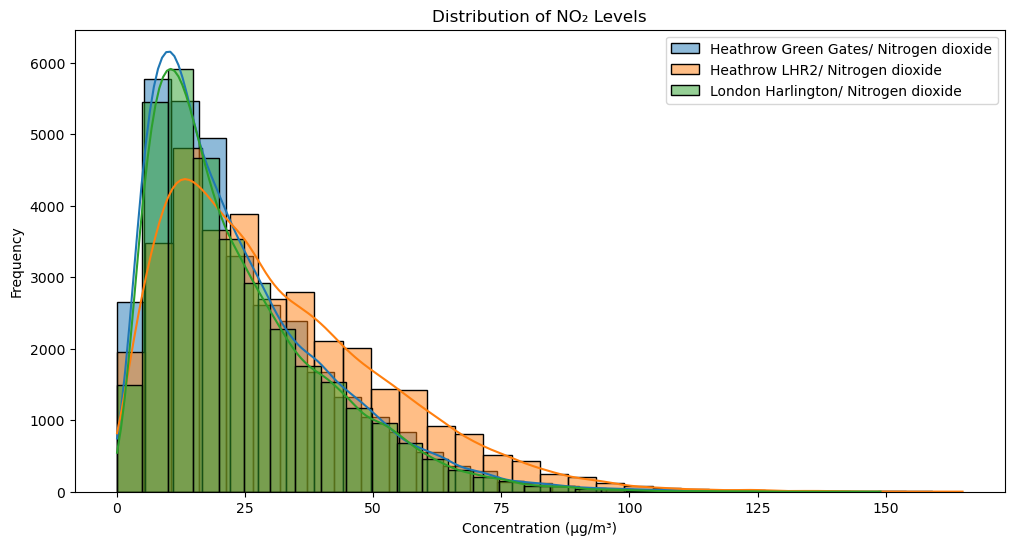

Heathrow Green Gates/ Nitrogen dioxide - Shapiro-Wilk p-value: 0.00000 (Stat=0.88412)
Data is NOT normal ❌
Heathrow LHR2/ Nitrogen dioxide - Shapiro-Wilk p-value: 0.00000 (Stat=0.92271)
Data is NOT normal ❌
London Harlington/ Nitrogen dioxide - Shapiro-Wilk p-value: 0.00000 (Stat=0.89125)
Data is NOT normal ❌
Heathrow Green Gates/ Nitrogen dioxide - KS Test p-value: 0.00000
Heathrow LHR2/ Nitrogen dioxide - KS Test p-value: 0.00000
London Harlington/ Nitrogen dioxide - KS Test p-value: 0.00000


/opt/conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 33743.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 33741.
  res = hypotest_fun_out(*samples, **kwds)


In [4]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Merged_AirQuality_NearHeathrow.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define pollutants
pollutants = ["Heathrow Green Gates/ Nitrogen dioxide", 
              "Heathrow LHR2/ Nitrogen dioxide", 
              "London Harlington/ Nitrogen dioxide"]

# Histogram & KDE Plot
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    sns.histplot(df[pollutant], kde=True, label=pollutant, bins=30)
plt.legend()
plt.title("Distribution of NO₂ Levels")
plt.xlabel("Concentration (µg/m³)")
plt.ylabel("Frequency")
plt.show()

# Shapiro-Wilk Test
for pollutant in pollutants:
    stat, p = stats.shapiro(df[pollutant].dropna())  # Remove NaN for test
    print(f"{pollutant} - Shapiro-Wilk p-value: {p:.5f} (Stat={stat:.5f})")
    if p > 0.05:
        print("Data appears normal ✅")
    else:
        print("Data is NOT normal ❌")

# Kolmogorov-Smirnov Test
for pollutant in pollutants:
    stat, p = stats.kstest(df[pollutant].dropna(), 'norm')
    print(f"{pollutant} - KS Test p-value: {p:.5f}")


In [5]:
import pandas as pd
import scipy.stats as stats

# Load merged dataset
file_path = "Merged_AirQuality_NearHeathrow.csv"  
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define monitoring sites and pollutant
pollutant = "Nitrogen dioxide"
sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ " + pollutant,
    "Heathrow LHR2": "Heathrow LHR2/ " + pollutant,
    "London Harlington": "London Harlington/ " + pollutant
}

# Define periods for analysis
pre_covid = df.loc["2019-01-01":"2020-02-29"]
during_covid = df.loc["2020-03-01":"2021-06-30"]
post_covid = df.loc["2021-07-01":"2023-12-31"]

# Store the data in a dictionary for analysis
periods = {
    "Pre-COVID": pre_covid,
    "During-COVID": during_covid,
    "Post-COVID": post_covid
}


In [6]:
# Kruskal-Wallis test for each site
for site, col in sites.items():
    data = [periods["Pre-COVID"][col].dropna(), 
            periods["During-COVID"][col].dropna(), 
            periods["Post-COVID"][col].dropna()]
    
    stat, p = stats.kruskal(*data)
    
    print(f"Kruskal-Wallis Test for {site}: H-stat={stat:.3f}, p-value={p:.5f}")
    
    if p < 0.05:
        print(" → Significant difference found between at least one period! ✅\n")
    else:
        print(" → No significant difference found ❌\n")


Kruskal-Wallis Test for Heathrow Green Gates: H-stat=2362.973, p-value=0.00000
 → Significant difference found between at least one period! ✅

Kruskal-Wallis Test for Heathrow LHR2: H-stat=4202.212, p-value=0.00000
 → Significant difference found between at least one period! ✅

Kruskal-Wallis Test for London Harlington: H-stat=2423.503, p-value=0.00000
 → Significant difference found between at least one period! ✅



In [7]:
# Function for Mann-Whitney U test between periods
def mann_whitney_test(data1, data2, label1, label2, site):
    stat, p = stats.mannwhitneyu(data1, data2, alternative="two-sided")
    print(f"Mann-Whitney U Test for {site} ({label1} vs {label2}): U-stat={stat:.3f}, p-value={p:.5f}")
    
    if p < 0.05:
        print(" → Significant difference found! ✅\n")
    else:
        print(" → No significant difference ❌\n")

# Run pairwise Mann-Whitney U tests for each site
for site, col in sites.items():
    pre = periods["Pre-COVID"][col].dropna()
    during = periods["During-COVID"][col].dropna()
    post = periods["Post-COVID"][col].dropna()
    
    mann_whitney_test(pre, during, "Pre-COVID", "During-COVID", site)
    mann_whitney_test(pre, post, "Pre-COVID", "Post-COVID", site)
    mann_whitney_test(during, post, "During-COVID", "Post-COVID", site)


Mann-Whitney U Test for Heathrow Green Gates (Pre-COVID vs During-COVID): U-stat=75453540.500, p-value=0.00000
 → Significant difference found! ✅

Mann-Whitney U Test for Heathrow Green Gates (Pre-COVID vs Post-COVID): U-stat=73912636.500, p-value=0.00000
 → Significant difference found! ✅

Mann-Whitney U Test for Heathrow Green Gates (During-COVID vs Post-COVID): U-stat=56037741.500, p-value=0.00000
 → Significant difference found! ✅

Mann-Whitney U Test for Heathrow LHR2 (Pre-COVID vs During-COVID): U-stat=82200681.500, p-value=0.00000
 → Significant difference found! ✅

Mann-Whitney U Test for Heathrow LHR2 (Pre-COVID vs Post-COVID): U-stat=82812902.000, p-value=0.00000
 → Significant difference found! ✅

Mann-Whitney U Test for Heathrow LHR2 (During-COVID vs Post-COVID): U-stat=56368488.000, p-value=0.00000
 → Significant difference found! ✅

Mann-Whitney U Test for London Harlington (Pre-COVID vs During-COVID): U-stat=75681000.500, p-value=0.00000
 → Significant difference found! 

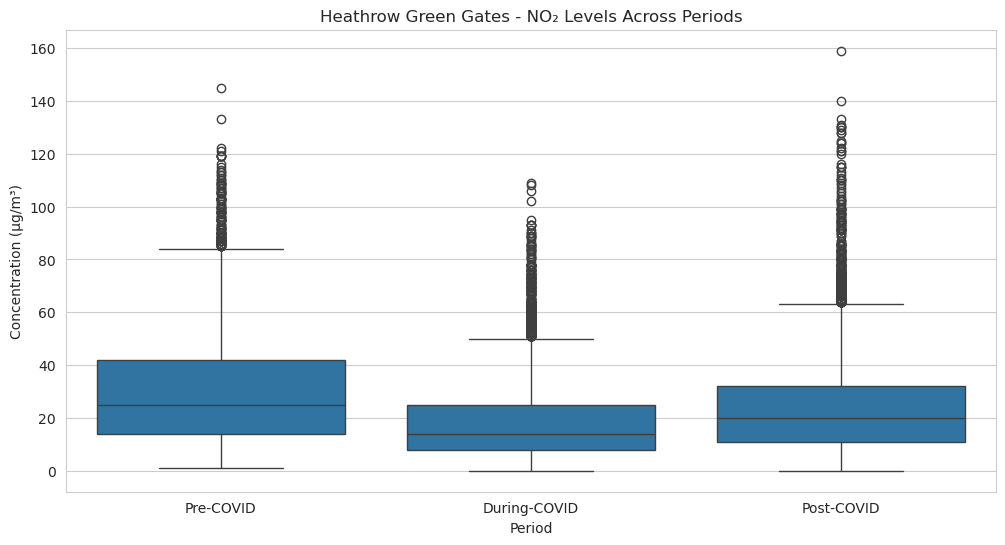

ValueError: cannot reindex on an axis with duplicate labels

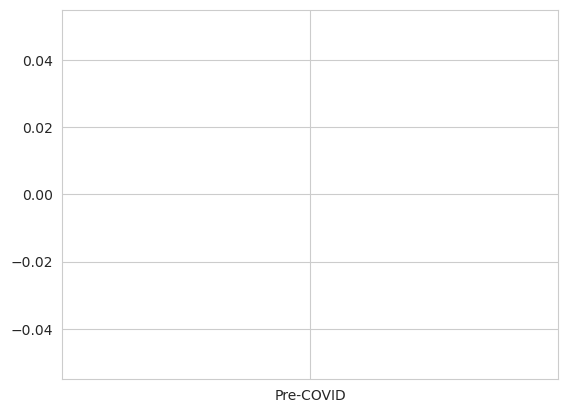

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, rankdata

# Load the merged dataset
file_path = "Merged_AirQuality_NearHeathrow.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define monitoring sites near Heathrow
near_heathrow_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ Nitrogen dioxide",
    "Heathrow LHR2": "Heathrow LHR2/ Nitrogen dioxide",
    "London Harlington": "London Harlington/ Nitrogen dioxide"
}

# Define periods
df["Period"] = np.where(df.index < "2020-03-01", "Pre-COVID",
                        np.where(df.index < "2021-07-01", "During-COVID", "Post-COVID"))

# Function to compute rank-biserial correlation (alternative to Cliff's Delta)
def rank_biserial_effect_size(group1, group2):
    u_stat, _ = mannwhitneyu(group1, group2, alternative="two-sided")
    n1, n2 = len(group1), len(group2)
    rank_biserial = 1 - (2 * u_stat) / (n1 * n2)
    return rank_biserial

# Create empty dictionary for results
effect_sizes = {}

# Create figure for boxplots
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Loop through each site and perform analysis
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Extract data for each period
        pre = df[df["Period"] == "Pre-COVID"][col_name].dropna()
        during = df[df["Period"] == "During-COVID"][col_name].dropna()
        post = df[df["Period"] == "Post-COVID"][col_name].dropna()

        # Compute effect sizes using rank-biserial correlation
        delta_pre_during = rank_biserial_effect_size(pre, during)
        delta_pre_post = rank_biserial_effect_size(pre, post)
        delta_during_post = rank_biserial_effect_size(during, post)

        # Store results
        effect_sizes[site] = {
            "Rank Biserial (Pre vs During)": delta_pre_during,
            "Rank Biserial (Pre vs Post)": delta_pre_post,
            "Rank Biserial (During vs Post)": delta_during_post
        }

        # Boxplot for visualization
        sns.boxplot(x="Period", y=col_name, data=df, order=["Pre-COVID", "During-COVID", "Post-COVID"])
        plt.title(f"{site} - NO₂ Levels Across Periods")
        plt.xlabel("Period")
        plt.ylabel("Concentration (µg/m³)")
        plt.show()

# Convert results to DataFrame and display
effect_size_df = pd.DataFrame.from_dict(effect_sizes, orient="index")
print(effect_size_df)

# Save the effect sizes as CSV for documentation
effect_size_df.to_csv("Effect_Sizes_NO2.csv")
print("\nEffect size results saved to 'Effect_Sizes_NO2.csv'.")


In [13]:
pip install git+https://github.com/neilernst/cliffsDelta.git

  Cloning https://github.com/neilernst/cliffsDelta.git to /tmp/pip-req-build-gtvg2h9u
  Running command git clone --filter=blob:none --quiet https://github.com/neilernst/cliffsDelta.git /tmp/pip-req-build-gtvg2h9u
  Resolved https://github.com/neilernst/cliffsDelta.git to commit 8f652b4d0b2c31814a1b93b8f31cc42746359c08
  Preparing metadata (setup.py) ... done
  Created wheel for cliffs_delta: filename=cliffs_delta-1.0.0-py3-none-any.whl size=10381 sha256=9d2c27d0c61eb6cca456eccadc8593483d473d4b4edc6c6dd4434af5433f4ac3
  Stored in directory: /tmp/pip-ephem-wheel-cache-6oov3fem/wheels/f8/4c/5e/486f6d818e7280178ca1d561f115789db69f4f0569f21d14af
Successfully built cliffs_delta
Note: you may need to restart the kernel to use updated packages.


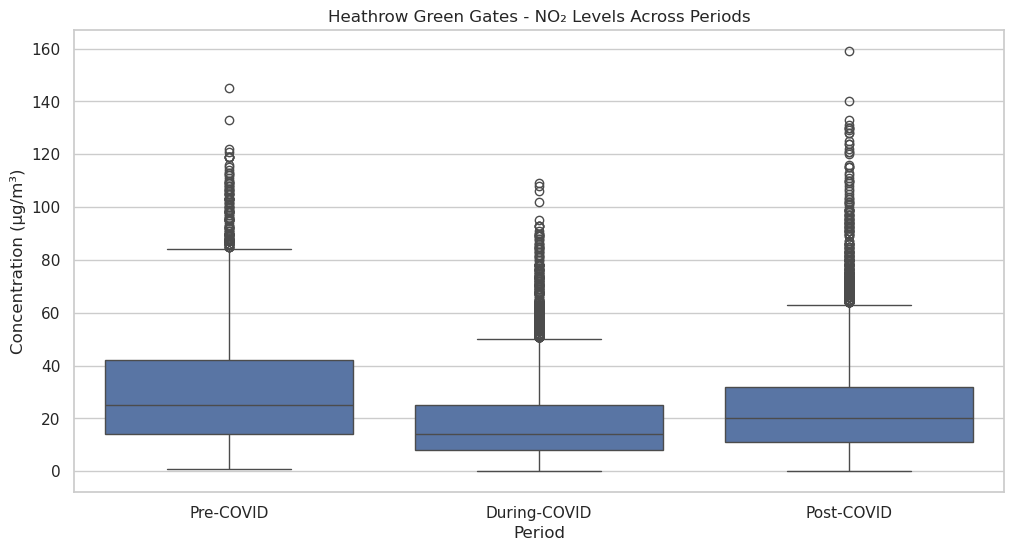

ValueError: cannot reindex on an axis with duplicate labels

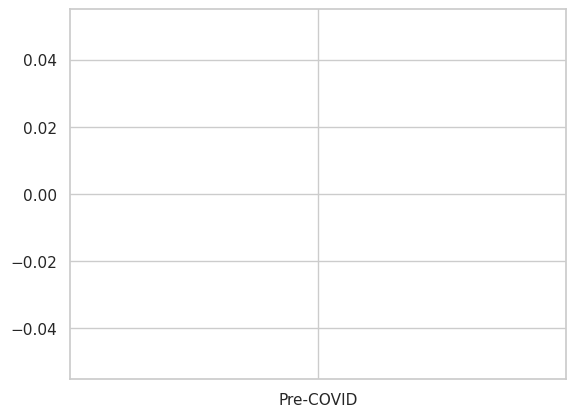

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from cliffs_delta import cliffs_delta

# Load the merged dataset
file_path = "Merged_AirQuality_NearHeathrow.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define monitoring sites near Heathrow
near_heathrow_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ Nitrogen dioxide",
    "Heathrow LHR2": "Heathrow LHR2/ Nitrogen dioxide",
    "London Harlington": "London Harlington/ Nitrogen dioxide"
}

# Define periods
df["Period"] = np.where(df.index < "2020-03-01", "Pre-COVID",
                        np.where(df.index < "2021-07-01", "During-COVID", "Post-COVID"))

# Create empty dictionary for effect size results
effect_sizes = {}

# Create figure for boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Loop through each site and perform effect size analysis
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Extract data for each period
        pre = df[df["Period"] == "Pre-COVID"][col_name].dropna()
        during = df[df["Period"] == "During-COVID"][col_name].dropna()
        post = df[df["Period"] == "Post-COVID"][col_name].dropna()

        # Compute Cliffs Delta effect sizes
        delta_pre_during = cliffs_delta(pre, during)
        delta_pre_post = cliffs_delta(pre, post)
        delta_during_post = cliffs_delta(during, post)

        # Store results
        effect_sizes[site] = {
            "Cliff's Delta (Pre vs During)": delta_pre_during[0],
            "Cliff's Delta (Pre vs Post)": delta_pre_post[0],
            "Cliff's Delta (During vs Post)": delta_during_post[0]
        }

        # Boxplot for visualization
        sns.boxplot(x="Period", y=col_name, data=df, order=["Pre-COVID", "During-COVID", "Post-COVID"])
        plt.title(f"{site} - NO₂ Levels Across Periods")
        plt.xlabel("Period")
        plt.ylabel("Concentration (µg/m³)")
        plt.show()

# Convert results to DataFrame and save
effect_size_df = pd.DataFrame.from_dict(effect_sizes, orient="index")
effect_size_df.to_csv("Effect_Sizes_NO2.csv")

# Display results
print(effect_size_df)
print("Effect size results saved to 'Effect_Sizes_NO2.csv'.")



In [17]:
# Check for duplicate timestamps
duplicate_timestamps = df.index[df.index.duplicated(keep=False)]
if not duplicate_timestamps.empty:
    print(f"Warning: Found {len(duplicate_timestamps)} duplicate timestamps. Resolving them...")

# Remove duplicates, keeping the first occurrence
df = df[~df.index.duplicated(keep='first')]
print("Duplicate timestamps removed.")


Duplicate timestamps removed.


<Figure size 1200x600 with 0 Axes>

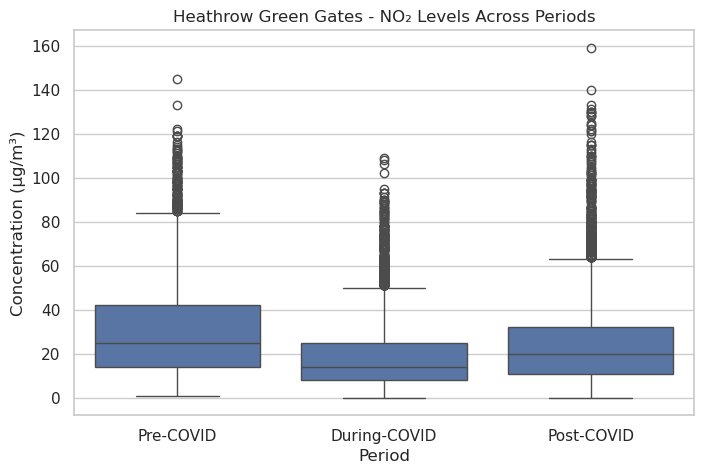

ValueError: cannot reindex on an axis with duplicate labels

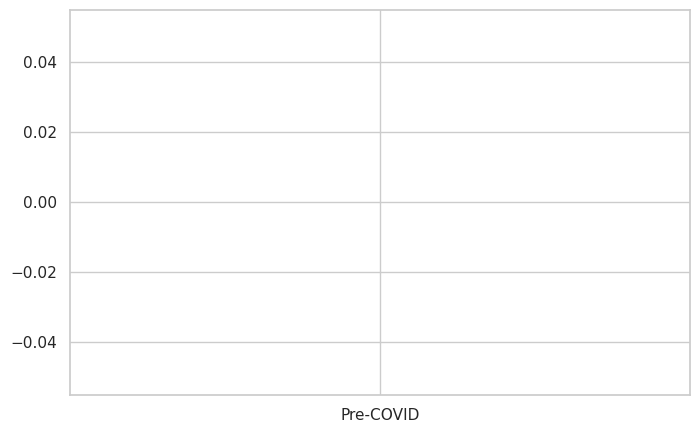

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from cliffs_delta import cliffs_delta  # Ensure this is installed

# Load the merged dataset
file_path = "Merged_AirQuality_NearHeathrow.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define monitoring sites near Heathrow
near_heathrow_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ Nitrogen dioxide",
    "Heathrow LHR2": "Heathrow LHR2/ Nitrogen dioxide",
    "London Harlington": "London Harlington/ Nitrogen dioxide"
}

# Define periods
df["Period"] = np.where(df.index < "2020-03-01", "Pre-COVID",
                        np.where(df.index < "2021-07-01", "During-COVID", "Post-COVID"))

# Convert 'Period' to a categorical variable for correct sorting
df["Period"] = pd.Categorical(df["Period"], categories=["Pre-COVID", "During-COVID", "Post-COVID"], ordered=True)

# Create empty dictionary for effect size results
effect_sizes = {}

# Create figure for boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Loop through each site and perform effect size analysis
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        # Extract data for each period
        pre = df[df["Period"] == "Pre-COVID"][col_name].dropna()
        during = df[df["Period"] == "During-COVID"][col_name].dropna()
        post = df[df["Period"] == "Post-COVID"][col_name].dropna()

        # Compute Cliff's Delta effect sizes
        delta_pre_during = cliffs_delta(pre.tolist(), during.tolist())[0]
        delta_pre_post = cliffs_delta(pre.tolist(), post.tolist())[0]
        delta_during_post = cliffs_delta(during.tolist(), post.tolist())[0]

        # Store results
        effect_sizes[site] = {
            "Cliff's Delta (Pre vs During)": delta_pre_during,
            "Cliff's Delta (Pre vs Post)": delta_pre_post,
            "Cliff's Delta (During vs Post)": delta_during_post
        }

        # Boxplot for visualization
        plt.figure(figsize=(8, 5))
        sns.boxplot(x="Period", y=col_name, data=df, order=["Pre-COVID", "During-COVID", "Post-COVID"])
        plt.title(f"{site} - NO₂ Levels Across Periods")
        plt.xlabel("Period")
        plt.ylabel("Concentration (µg/m³)")
        plt.show()

# Convert results to DataFrame and save
effect_size_df = pd.DataFrame.from_dict(effect_sizes, orient="index")
effect_size_df.to_csv("Effect_Sizes_NO2.csv")

# Display results
print(effect_size_df)
print("Effect size results saved to 'Effect_Sizes_NO2.csv'.")


In [19]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
file_path = "Merged_AirQuality_NearHeathrow.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define monitoring sites near Heathrow
near_heathrow_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ Nitrogen dioxide",
    "Heathrow LHR2": "Heathrow LHR2/ Nitrogen dioxide",
    "London Harlington": "London Harlington/ Nitrogen dioxide"
}

# Assign periods based on the date ranges
df["Period"] = np.where(df.index < "2020-03-01", "Pre-COVID",
                        np.where(df.index < "2021-07-01", "During-COVID", "Post-COVID"))

# Dictionary to store test results
kruskal_results = {}
mann_whitney_results = []

# 📌 **Kruskal-Wallis Test (Compares all 3 periods together)**
print("\n--- Kruskal-Wallis Test Results ---")
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        pre = df[df["Period"] == "Pre-COVID"][col_name].dropna()
        during = df[df["Period"] == "During-COVID"][col_name].dropna()
        post = df[df["Period"] == "Post-COVID"][col_name].dropna()

        # Perform Kruskal-Wallis test
        H_stat, p_value = stats.kruskal(pre, during, post)
        kruskal_results[site] = {"H-stat": H_stat, "p-value": p_value}

        # Display result
        print(f"{site}: H-stat={H_stat:.3f}, p-value={p_value:.5f}")
        if p_value < 0.05:
            print("  ➜ Significant difference found ✅\n")
        else:
            print("  ➜ No significant difference ❌\n")

# 📌 **Mann-Whitney U Tests (Pairwise Comparisons)**
print("\n--- Mann-Whitney U Test Results ---")
for site, col_name in near_heathrow_sites.items():
    if col_name in df.columns:
        pre = df[df["Period"] == "Pre-COVID"][col_name].dropna()
        during = df[df["Period"] == "During-COVID"][col_name].dropna()
        post = df[df["Period"] == "Post-COVID"][col_name].dropna()

        # Pairwise Mann-Whitney U tests
        comparisons = [
            ("Pre-COVID", "During-COVID", pre, during),
            ("Pre-COVID", "Post-COVID", pre, post),
            ("During-COVID", "Post-COVID", during, post)
        ]
        
        for period1, period2, data1, data2 in comparisons:
            stat, p = stats.mannwhitneyu(data1, data2, alternative="two-sided")
            mann_whitney_results.append([site, period1, period2, stat, p])

            # Display result
            print(f"Mann-Whitney U Test for {site} ({period1} vs {period2}): U-stat={stat:.3f}, p-value={p:.5f}")
            if p < 0.05:
                print("  ➜ Significant difference found ✅\n")
            else:
                print("  ➜ No significant difference ❌\n")

# 📌 **Save Mann-Whitney Results to CSV**
mann_whitney_df = pd.DataFrame(mann_whitney_results, columns=["Site", "Period1", "Period2", "U-stat", "p-value"])
mann_whitney_df.to_csv("Mann_Whitney_Results.csv", index=False)
print("\nMann-Whitney test results saved to Mann_Whitney_Results.csv ✅")




--- Kruskal-Wallis Test Results ---
Heathrow Green Gates: H-stat=2362.973, p-value=0.00000
  ➜ Significant difference found ✅

Heathrow LHR2: H-stat=4202.212, p-value=0.00000
  ➜ Significant difference found ✅

London Harlington: H-stat=2423.503, p-value=0.00000
  ➜ Significant difference found ✅


--- Mann-Whitney U Test Results ---
Mann-Whitney U Test for Heathrow Green Gates (Pre-COVID vs During-COVID): U-stat=75453540.500, p-value=0.00000
  ➜ Significant difference found ✅

Mann-Whitney U Test for Heathrow Green Gates (Pre-COVID vs Post-COVID): U-stat=73912636.500, p-value=0.00000
  ➜ Significant difference found ✅

Mann-Whitney U Test for Heathrow Green Gates (During-COVID vs Post-COVID): U-stat=56037741.500, p-value=0.00000
  ➜ Significant difference found ✅

Mann-Whitney U Test for Heathrow LHR2 (Pre-COVID vs During-COVID): U-stat=82200681.500, p-value=0.00000
  ➜ Significant difference found ✅

Mann-Whitney U Test for Heathrow LHR2 (Pre-COVID vs Post-COVID): U-stat=82812902.00

<Figure size 1000x500 with 0 Axes>

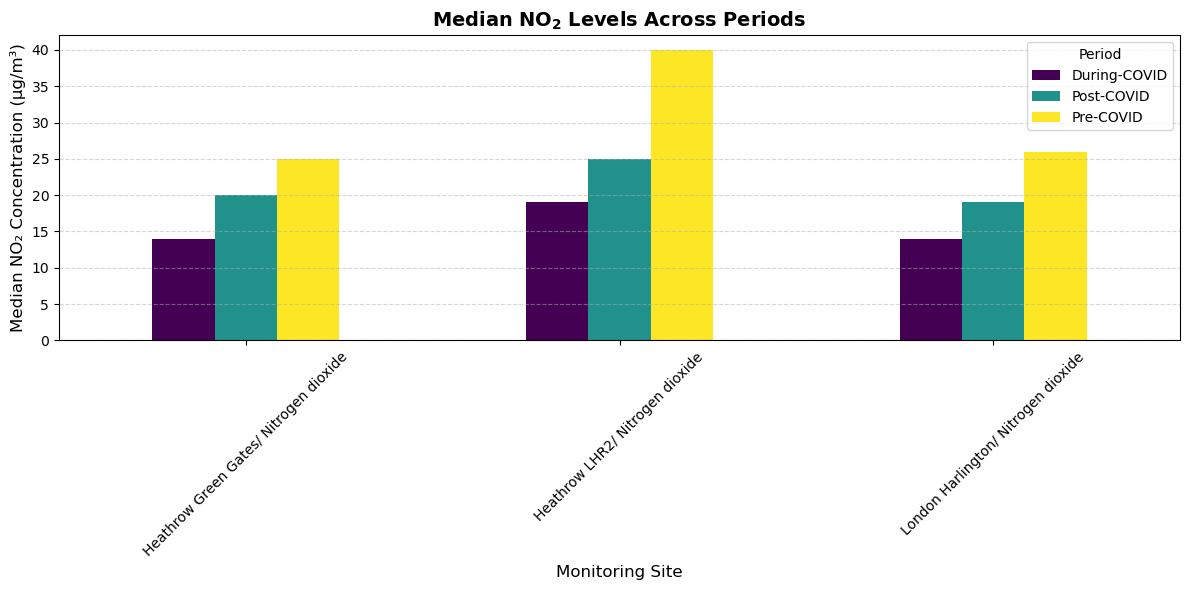

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
file_path = "Merged_AirQuality_NearHeathrow.csv"  # Update file path if needed
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define monitoring sites and pollutants
near_heathrow_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ Nitrogen dioxide",
    "Heathrow LHR2": "Heathrow LHR2/ Nitrogen dioxide",
    "London Harlington": "London Harlington/ Nitrogen dioxide"
}

# Define periods
df["Period"] = np.where(df.index < "2020-03-01", "Pre-COVID",
                np.where(df.index < "2021-07-01", "During-COVID", "Post-COVID"))

# Compute median NO₂ levels for each site and period
median_no2 = df.groupby(["Period"])[list(near_heathrow_sites.values())].median()

# Plot median NO₂ levels
plt.figure(figsize=(10, 5))
median_no2.T.plot(kind="bar", figsize=(12, 6), colormap="viridis")

# Formatting
plt.title(r"$\mathbf{Median\ NO_2\ Levels\ Across\ Periods}$", fontsize=14)
plt.xlabel("Monitoring Site", fontsize=12)
plt.ylabel("Median NO₂ Concentration (µg/m³)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Period")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()



In [3]:
from scipy.stats import mannwhitneyu

# Define the pollutants for testing
pollutants = {
    "PM10": ["Heathrow Green Gates/ PM10 Particulate matter",
             "Heathrow LHR2/ PM10 Particulate matter",
             "London Harlington/ PM10 Particulate matter"],
    
    "PM2.5": ["Heathrow Green Gates/ PM2.5 Particulate matter",
              "Heathrow LHR2/ PM2.5 Particulate matter",
              "London Harlington/ PM2.5 Particulate matter"]
}

# Function for Mann-Whitney U test
def mann_whitney_test(data1, data2, label1, label2, site):
    stat, p = mannwhitneyu(data1, data2, alternative="two-sided")
    print(f"Mann-Whitney U Test for {site} ({label1} vs {label2}): U-stat={stat:.3f}, p-value={p:.5f}")
    if p < 0.05:
        print("   → Significant difference found! ✅\n")
    else:
        print("   → No significant difference ❌\n")

# Run Mann-Whitney tests for PM10 and PM2.5
for pollutant, sites in pollutants.items():
    print(f"\n{'='*40}\n{pollutant} Levels Statistical Comparison\n{'='*40}")
    
    for site in sites:
        pre = df[df["Period"] == "Pre-COVID"][site].dropna()
        during = df[df["Period"] == "During-COVID"][site].dropna()
        post = df[df["Period"] == "Post-COVID"][site].dropna()

        mann_whitney_test(pre, during, "Pre-COVID", "During-COVID", site)
        mann_whitney_test(pre, post, "Pre-COVID", "Post-COVID", site)
        mann_whitney_test(during, post, "During-COVID", "Post-COVID", site)



PM10 Levels Statistical Comparison
Mann-Whitney U Test for Heathrow Green Gates/ PM10 Particulate matter (Pre-COVID vs During-COVID): U-stat=56133176.000, p-value=0.00161
   → Significant difference found! ✅

Mann-Whitney U Test for Heathrow Green Gates/ PM10 Particulate matter (Pre-COVID vs Post-COVID): U-stat=60925362.000, p-value=0.00236
   → Significant difference found! ✅

Mann-Whitney U Test for Heathrow Green Gates/ PM10 Particulate matter (During-COVID vs Post-COVID): U-stat=67862315.000, p-value=0.00000
   → Significant difference found! ✅

Mann-Whitney U Test for Heathrow LHR2/ PM10 Particulate matter (Pre-COVID vs During-COVID): U-stat=59256063.500, p-value=0.00000
   → Significant difference found! ✅

Mann-Whitney U Test for Heathrow LHR2/ PM10 Particulate matter (Pre-COVID vs Post-COVID): U-stat=63208796.000, p-value=0.09245
   → No significant difference ❌

Mann-Whitney U Test for Heathrow LHR2/ PM10 Particulate matter (During-COVID vs Post-COVID): U-stat=66262529.000, p

<Figure size 1000x500 with 0 Axes>

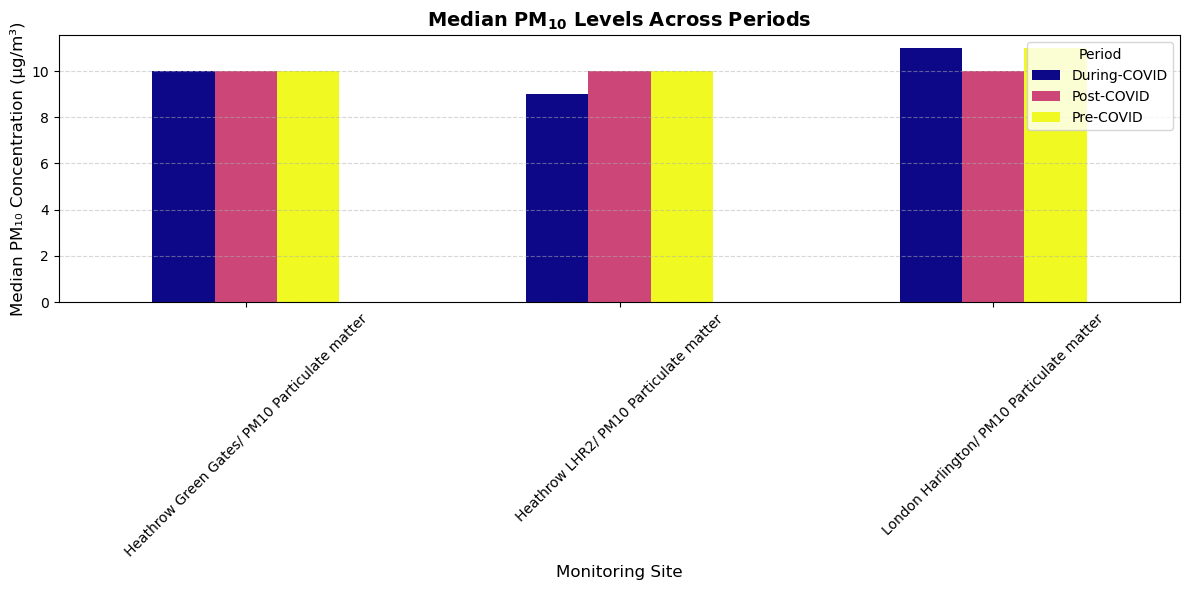

<Figure size 1000x500 with 0 Axes>

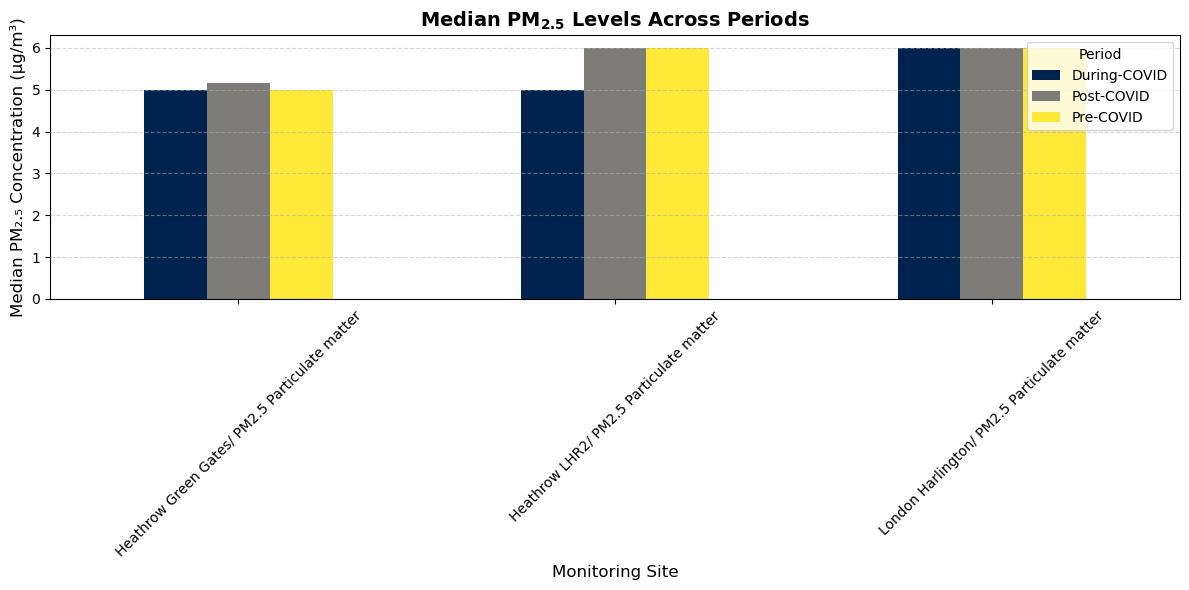

In [5]:
# Define pollutants for PM10 and PM2.5
pm10_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ PM10 Particulate matter",
    "Heathrow LHR2": "Heathrow LHR2/ PM10 Particulate matter",
    "London Harlington": "London Harlington/ PM10 Particulate matter"
}

pm25_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ PM2.5 Particulate matter",
    "Heathrow LHR2": "Heathrow LHR2/ PM2.5 Particulate matter",
    "London Harlington": "London Harlington/ PM2.5 Particulate matter"
}

# Compute median PM10 and PM2.5 levels
median_pm10 = df.groupby(["Period"])[list(pm10_sites.values())].median()
median_pm25 = df.groupby(["Period"])[list(pm25_sites.values())].median()

# Plot PM10
plt.figure(figsize=(10, 5))
median_pm10.T.plot(kind="bar", figsize=(12, 6), colormap="plasma")

plt.title(r"$\mathbf{Median\ PM_{10}\ Levels\ Across\ Periods}$", fontsize=14)
plt.xlabel("Monitoring Site", fontsize=12)
plt.ylabel("Median PM₁₀ Concentration (µg/m³)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Period")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

# Plot PM2.5
plt.figure(figsize=(10, 5))
median_pm25.T.plot(kind="bar", figsize=(12, 6), colormap="cividis")

plt.title(r"$\mathbf{Median\ PM_{2.5}\ Levels\ Across\ Periods}$", fontsize=14)
plt.xlabel("Monitoring Site", fontsize=12)
plt.ylabel("Median PM₂.₅ Concentration (µg/m³)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Period")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

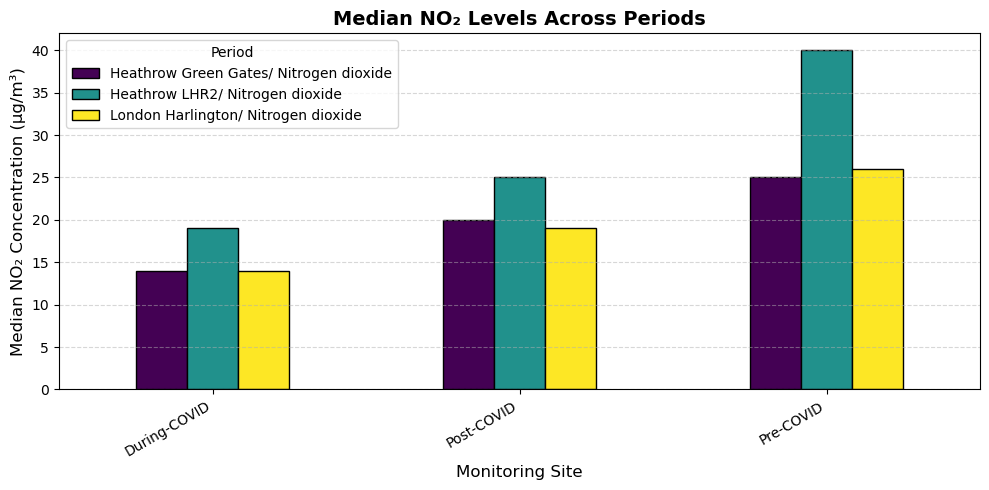

<Figure size 1000x500 with 0 Axes>

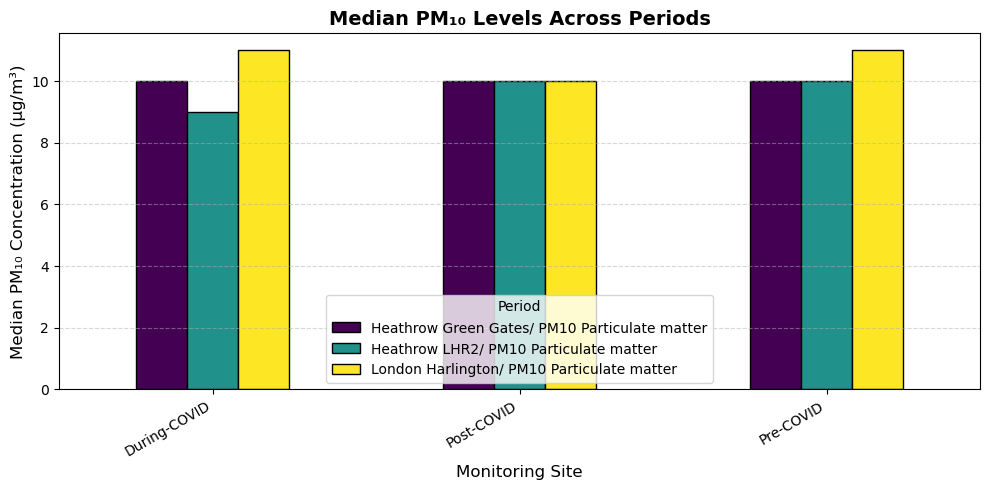

<Figure size 1000x500 with 0 Axes>

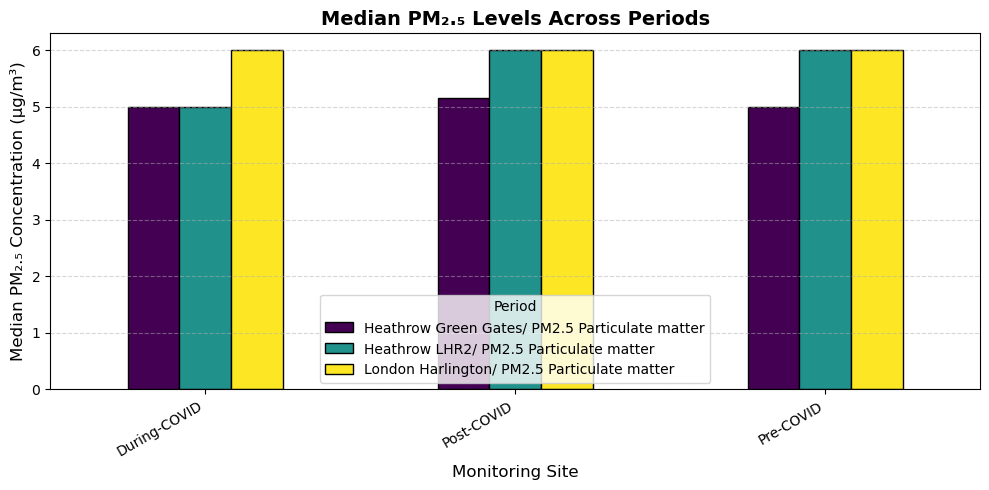

ModuleNotFoundError: No module named 'ace_tools'

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset (Update file path if necessary)
file_path = "Merged_AirQuality_NearHeathrow.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define monitoring sites and pollutants
near_heathrow_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ Nitrogen dioxide",
    "Heathrow LHR2": "Heathrow LHR2/ Nitrogen dioxide",
    "London Harlington": "London Harlington/ Nitrogen dioxide"
}

pm10_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ PM10 Particulate matter",
    "Heathrow LHR2": "Heathrow LHR2/ PM10 Particulate matter",
    "London Harlington": "London Harlington/ PM10 Particulate matter"
}

pm25_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ PM2.5 Particulate matter",
    "Heathrow LHR2": "Heathrow LHR2/ PM2.5 Particulate matter",
    "London Harlington": "London Harlington/ PM2.5 Particulate matter"
}

# Define periods
df["Period"] = np.where(df.index < "2020-03-01", "Pre-COVID",
                        np.where(df.index < "2021-07-01", "During-COVID", "Post-COVID"))

# Function to plot median concentrations
def plot_median_concentrations(pollutant_label, pollutant_cols):
    """
    Function to generate median concentration plots across periods for a given pollutant.
    :param pollutant_label: The pollutant name (e.g., NO₂, PM₁₀, PM₂.₅)
    :param pollutant_cols: Dictionary of sites and their respective column names
    """
    # Convert dict_values to list explicitly
    pollutant_columns = list(pollutant_cols.values())

    # Compute median values
    median_pollutant = df.groupby("Period")[pollutant_columns].median()

    # Set up figure
    plt.figure(figsize=(10, 5))
    median_pollutant.plot(kind="bar", figsize=(10, 5), colormap="viridis", edgecolor="black")

    # Formatting
    plt.title(f"Median {pollutant_label} Levels Across Periods", fontsize=14, fontweight="bold")
    plt.xlabel("Monitoring Site", fontsize=12)
    plt.ylabel(f"Median {pollutant_label} Concentration (µg/m³)", fontsize=12)
    plt.xticks(rotation=30, ha="right")
    plt.legend(title="Period")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()

    # Show plot
    plt.show()

# Generate refined plots
plot_median_concentrations("NO₂", near_heathrow_sites)
plot_median_concentrations("PM₁₀", pm10_sites)
plot_median_concentrations("PM₂.₅", pm25_sites)

# Compute key statistics for summary table
summary_stats = df.groupby("Period")[list(near_heathrow_sites.values()) + 
                                     list(pm10_sites.values()) + 
                                     list(pm25_sites.values())].median()

# Save to CSV
summary_stats.to_csv("Summary_Median_Concentrations.csv")

# Display summary
import ace_tools as tools
tools.display_dataframe_to_user(name="Summary of Median Pollutant Concentrations", dataframe=summary_stats)



In [7]:
# Compute key statistics for summary table
summary_stats = df.groupby("Period")[list(near_heathrow_sites.values()) + 
                                     list(pm10_sites.values()) + 
                                     list(pm25_sites.values())].median()

# Save to CSV
summary_stats.to_csv("Summary_Median_Concentrations.csv")

# Display summary
import ace_tools as tools
tools.display_dataframe_to_user(name="Summary of Median Pollutant Concentrations", dataframe=summary_stats)


ModuleNotFoundError: No module named 'ace_tools'

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

# Load merged dataset
file_path = "Merged_AirQuality_NearHeathrow.csv"  # Update if needed
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define monitoring sites and their coordinates (approximate)
site_locations = {
    "Heathrow Green Gates": (51.4775, -0.4614),
    "Heathrow LHR2": (51.4800, -0.4500),
    "London Harlington": (51.4880, -0.4419)
}

# Convert to DataFrame
site_df = pd.DataFrame.from_dict(site_locations, orient="index", columns=["Latitude", "Longitude"])
site_df.index.name = "Site"

# Merge with pollutant data (using latest values)
latest_values = df.groupby(df.index)[list(site_locations.keys())].last().iloc[-1]
site_df["NO2"] = latest_values

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(site_df, geometry=gpd.points_from_xy(site_df["Longitude"], site_df["Latitude"]), crs="EPSG:4326")

# Plot spatial distribution
fig, ax = plt.subplots(figsize=(8, 6))
gdf.plot(column="NO2", cmap="coolwarm", legend=True, ax=ax, markersize=200, edgecolor="black", alpha=0.8)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=gdf.crs)

# Formatting
plt.title("Spatial Distribution of NO₂ Levels Near Heathrow")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


KeyError: "Columns not found: 'London Harlington', 'Heathrow Green Gates', 'Heathrow LHR2'"

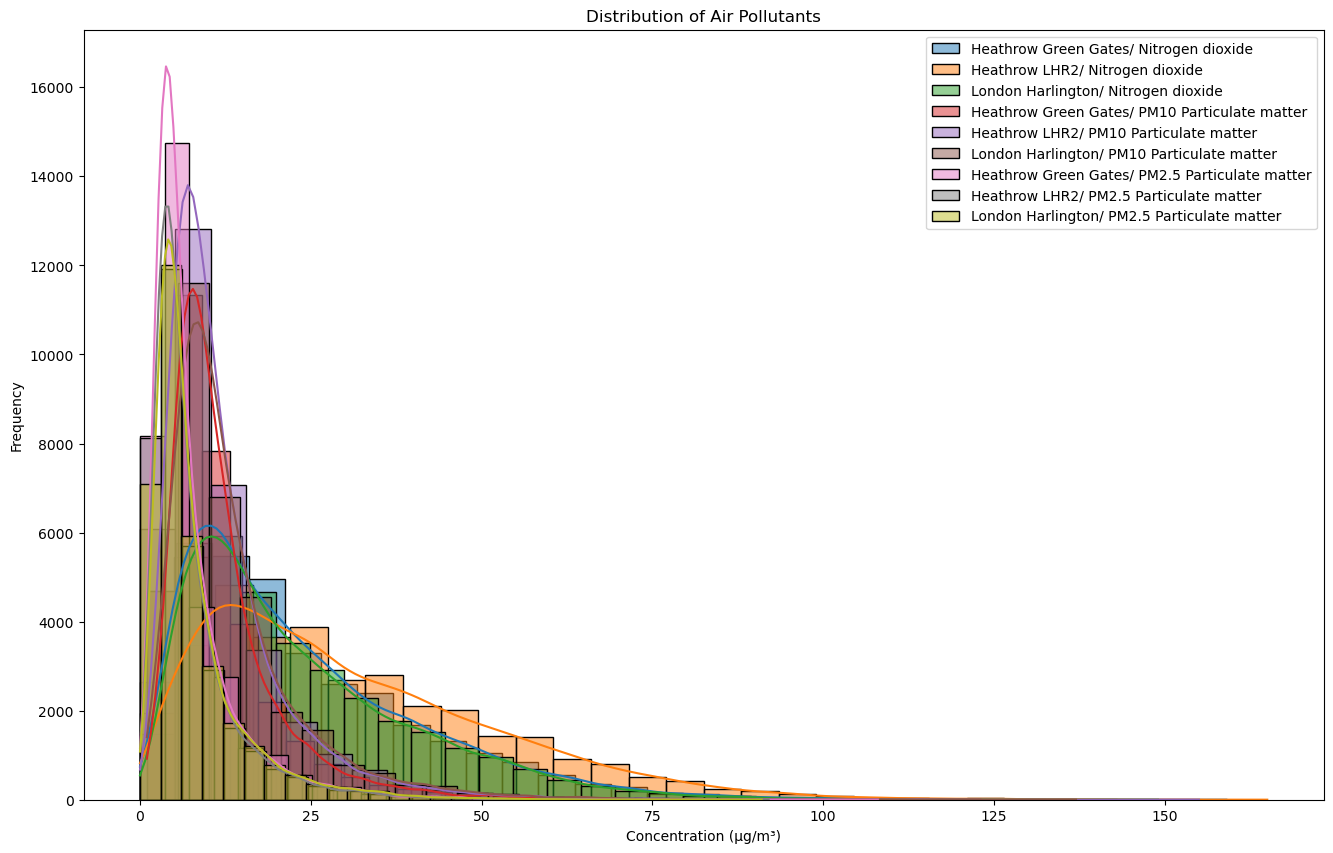

/opt/conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 33743.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 33741.
  res = hypotest_fun_out(*samples, **kwds)


Heathrow Green Gates/ Nitrogen dioxide – Shapiro-Wilk p = 0.00000 | ❌ Not normal
Heathrow Green Gates/ Nitrogen dioxide – KS p = 0.00000 | ❌ Not normal

Heathrow LHR2/ Nitrogen dioxide – Shapiro-Wilk p = 0.00000 | ❌ Not normal
Heathrow LHR2/ Nitrogen dioxide – KS p = 0.00000 | ❌ Not normal

London Harlington/ Nitrogen dioxide – Shapiro-Wilk p = 0.00000 | ❌ Not normal
London Harlington/ Nitrogen dioxide – KS p = 0.00000 | ❌ Not normal

Heathrow Green Gates/ PM10 Particulate matter – Shapiro-Wilk p = 0.00000 | ❌ Not normal
Heathrow Green Gates/ PM10 Particulate matter – KS p = 0.00000 | ❌ Not normal

Heathrow LHR2/ PM10 Particulate matter – Shapiro-Wilk p = 0.00000 | ❌ Not normal
Heathrow LHR2/ PM10 Particulate matter – KS p = 0.00000 | ❌ Not normal

London Harlington/ PM10 Particulate matter – Shapiro-Wilk p = 0.00000 | ❌ Not normal
London Harlington/ PM10 Particulate matter – KS p = 0.00000 | ❌ Not normal

Heathrow Green Gates/ PM2.5 Particulate matter – Shapiro-Wilk p = 0.00000 | ❌ No

<Figure size 1200x800 with 0 Axes>

In [5]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = "Merged_AirQuality_NearHeathrow.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define pollutants
pollutants = [
    "Heathrow Green Gates/ Nitrogen dioxide",
    "Heathrow LHR2/ Nitrogen dioxide",
    "London Harlington/ Nitrogen dioxide",
    "Heathrow Green Gates/ PM10 Particulate matter",
    "Heathrow LHR2/ PM10 Particulate matter",
    "London Harlington/ PM10 Particulate matter",
    "Heathrow Green Gates/ PM2.5 Particulate matter",
    "Heathrow LHR2/ PM2.5 Particulate matter",
    "London Harlington/ PM2.5 Particulate matter"
]

# Histogram + KDE
plt.figure(figsize=(16, 10))
for pollutant in pollutants:
    sns.histplot(df[pollutant].dropna(), kde=True, label=pollutant, bins=30)
plt.legend()
plt.title("Distribution of Air Pollutants")
plt.xlabel("Concentration (µg/m³)")
plt.ylabel("Frequency")
plt.show()

# Normality tests
for pollutant in pollutants:
    data = df[pollutant].dropna()

    # Shapiro-Wilk Test (note: sensitive to large N)
    stat_sw, p_sw = stats.shapiro(data)
    print(f"{pollutant} – Shapiro-Wilk p = {p_sw:.5f} | {'❌ Not normal' if p_sw < 0.05 else '✅ Possibly normal'}")

    # Kolmogorov-Smirnov Test
    stat_ks, p_ks = stats.kstest(data, 'norm')
    print(f"{pollutant} – KS p = {p_ks:.5f} | {'❌ Not normal' if p_ks < 0.05 else '✅ Possibly normal'}\n")

# Plotting (your plotting code goes here)
plt.figure(figsize=(12, 8))

# Your plotting commands (e.g. plt.hist(), sns.kdeplot(), etc.)
# ...


# ✅ Save the figure BEFORE displaying it
plt.savefig("AirPollutant_Distribution.png", dpi=300, bbox_inches="tight")







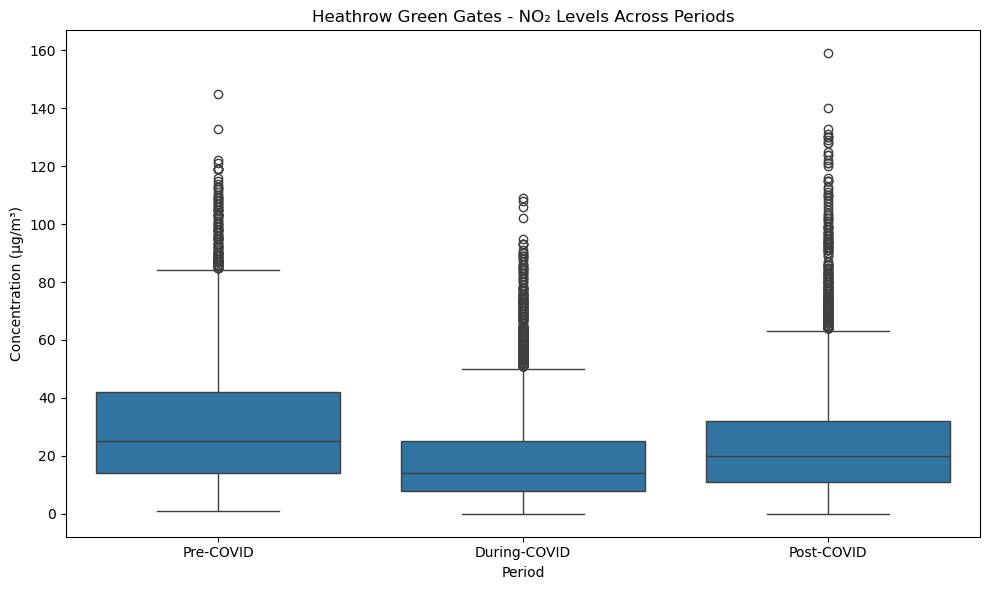

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu


file_path = "Merged_AirQuality_NearHeathrow.csv"
df = pd.read_csv(file_path, parse_dates=["Datetime"], index_col="Datetime")

# Define monitoring sites near Heathrow
near_heathrow_sites = {
    "Heathrow Green Gates": "Heathrow Green Gates/ Nitrogen dioxide",
    "Heathrow LHR2": "Heathrow LHR2/ Nitrogen dioxide",
    "London Harlington": "London Harlington/ Nitrogen dioxide"
}


df["Period"] = np.where(df.index < "2020-03-01", "Pre-COVID",
                        np.where(df.index < "2021-07-01", "During-COVID", "Post-COVID"))


def rank_biserial_effect_size(group1, group2):
    u_stat, _ = mannwhitneyu(group1, group2, alternative="two-sided")
    n1, n2 = len(group1), len(group2)
    rank_biserial = 1 - (2 * u_stat) / (n1 * n2)
    return rank_biserial

# Create empty dictionary for results
effect_sizes = {}

# Create and export boxplot for one site (e.g. Heathrow Green Gates)
site = "Heathrow Green Gates"
col_name = near_heathrow_sites[site]

# Extract data for each period
pre = df[df["Period"] == "Pre-COVID"][col_name].dropna()
during = df[df["Period"] == "During-COVID"][col_name].dropna()
post = df[df["Period"] == "Post-COVID"][col_name].dropna()

# Compute effect sizes
delta_pre_during = rank_biserial_effect_size(pre, during)
delta_pre_post = rank_biserial_effect_size(pre, post)
delta_during_post = rank_biserial_effect_size(during, post)

# Store results
effect_sizes[site] = {
    "Rank Biserial (Pre vs During)": delta_pre_during,
    "Rank Biserial (Pre vs Post)": delta_pre_post,
    "Rank Biserial (During vs Post)": delta_during_post
}

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Period", y=col_name, data=df, order=["Pre-COVID", "During-COVID", "Post-COVID"])
plt.title(f"{site} - NO₂ Levels Across Periods")
plt.xlabel("Period")
plt.ylabel("Concentration (µg/m³)")
plt.tight_layout()
plt.savefig("Heathrow_Green_Gates_NO2_Boxplot.png", dpi=300)
plt.show()

# Export effect sizes
effect_size_df = pd.DataFrame.from_dict(effect_sizes, orient="index")
effect_size_df.to_csv("Effect_Sizes_NO2_")


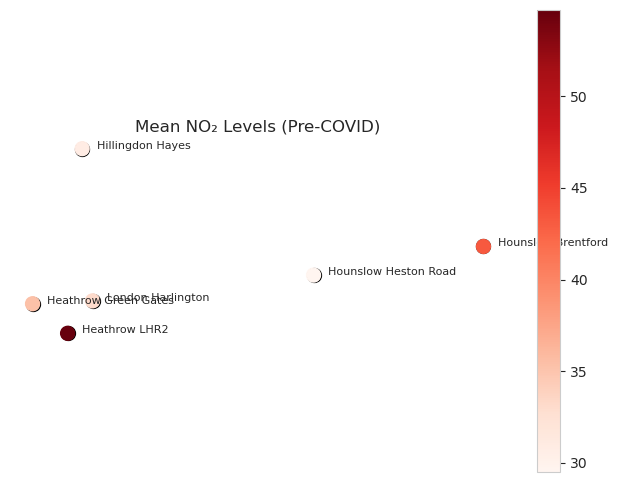

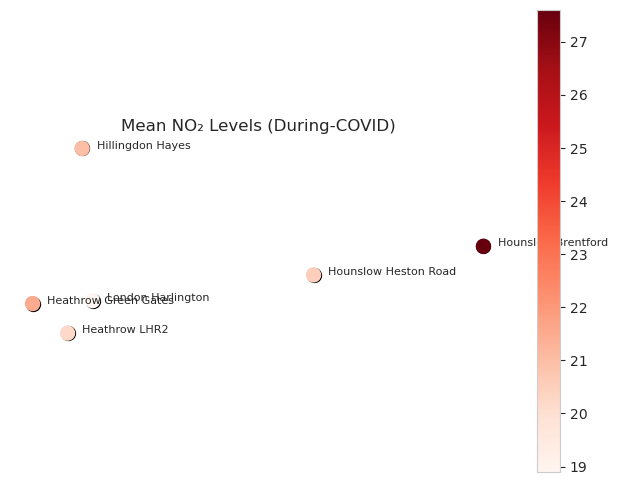

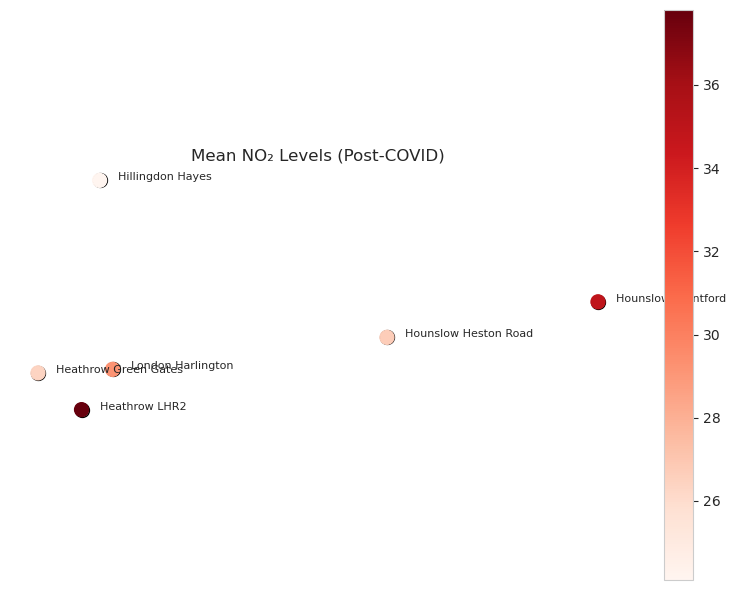

In [25]:

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


sites_data = {
    "Site": [
        "Heathrow Green Gates", "Heathrow LHR2", "London Harlington",
        "Hillingdon Hayes", "Hounslow Brentford", "Hounslow Heston Road"
    ],
    "Latitude": [51.4775, 51.4713, 51.4781, 51.5100, 51.4895, 51.4835],
    "Longitude": [-0.4614, -0.4496, -0.4412, -0.4447, -0.3096, -0.3668],
    "Pre-COVID": [35.4, 54.7, 33.1, 30.8, 43.2, 29.5],
    "During-COVID": [21.5, 20.2, 18.9, 21.0, 27.6, 20.5],
    "Post-COVID": [26.4, 37.8, 29.2, 24.1, 34.9, 26.7]
}

# Create DataFrame
df_sites = pd.DataFrame(sites_data)

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(df_sites["Longitude"], df_sites["Latitude"])]
gdf = gpd.GeoDataFrame(df_sites, geometry=geometry, crs="EPSG:4326")

# Plot mean NO2 levels by period
periods = ["Pre-COVID", "During-COVID", "Post-COVID"]

for period in periods:
    fig, ax = plt.subplots(figsize=(8, 6))
    gdf.plot(ax=ax, color="lightgrey", markersize=100, edgecolor="black")
    gdf.plot(ax=ax, column=period, cmap="Reds", legend=True, markersize=100)
    
    for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["Site"]):
        ax.text(x + 0.005, y, label, fontsize=8)
    
    ax.set_title(f"Mean NO₂ Levels ({period})")
    ax.set_axis_off()

plt.tight_layout()
plt.show()
